<a href="https://colab.research.google.com/github/Vishnu0920/Reinforcement_Learning/blob/main/CliffWalking_MultipleQLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

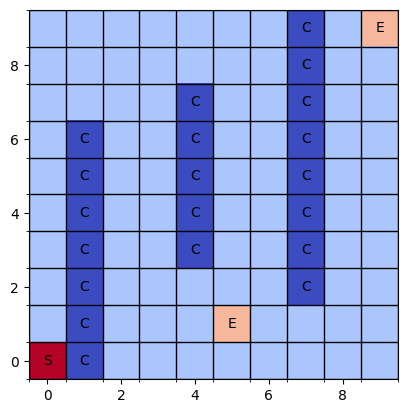

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_grid():
    grid_size = (10, 10)
    grid = np.zeros(grid_size)

    # Marking cliffs
    cliffs = [(1, i) for i in range(7)] + [(4, i) for i in range(3, 8)] + [(7, i) for i in range(2, 10)]
    for (x, y) in cliffs:
        grid[y, x] = -1  # using -1 to represent cliffs

    # Marking exits
    exits = [(9, 9), (5, 1)]
    for (x, y) in exits:
        grid[y, x] = 1  # using 1 to represent exits

    # Marking start position
    start = (0, 0)
    grid[start[1], start[0]] = 2  # using 2 to represent start

    # Plotting the grid
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='coolwarm', origin='lower')

    # Adding labels
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if grid[j, i] == -1:
                ax.text(i, j, 'C', ha='center', va='center', color='black')
            elif grid[j, i] == 1:
                ax.text(i, j, 'E', ha='center', va='center', color='black')
            elif grid[j, i] == 2:
                ax.text(i, j, 'S', ha='center', va='center', color='black')

    ax.set_xticks(np.arange(-0.5, grid_size[0], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size[1], 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    plt.show()

# Run the visualization
visualize_grid()


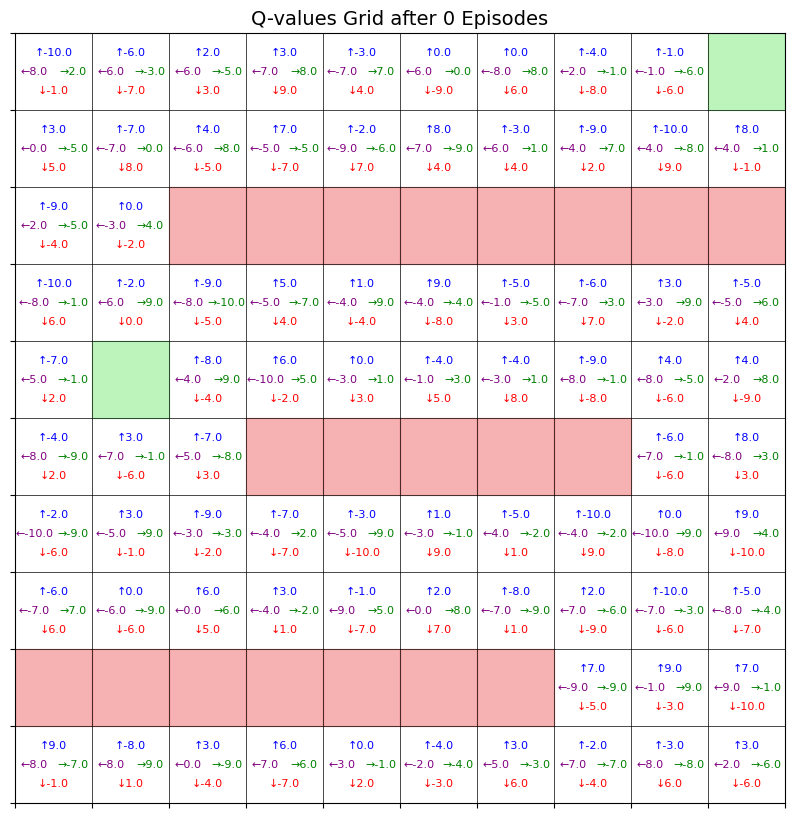

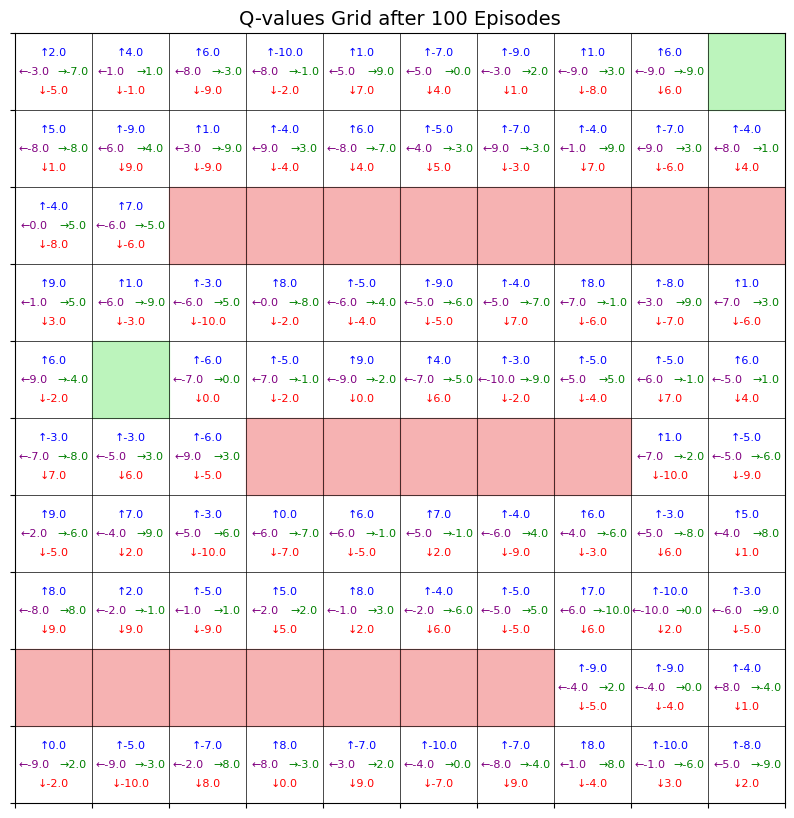

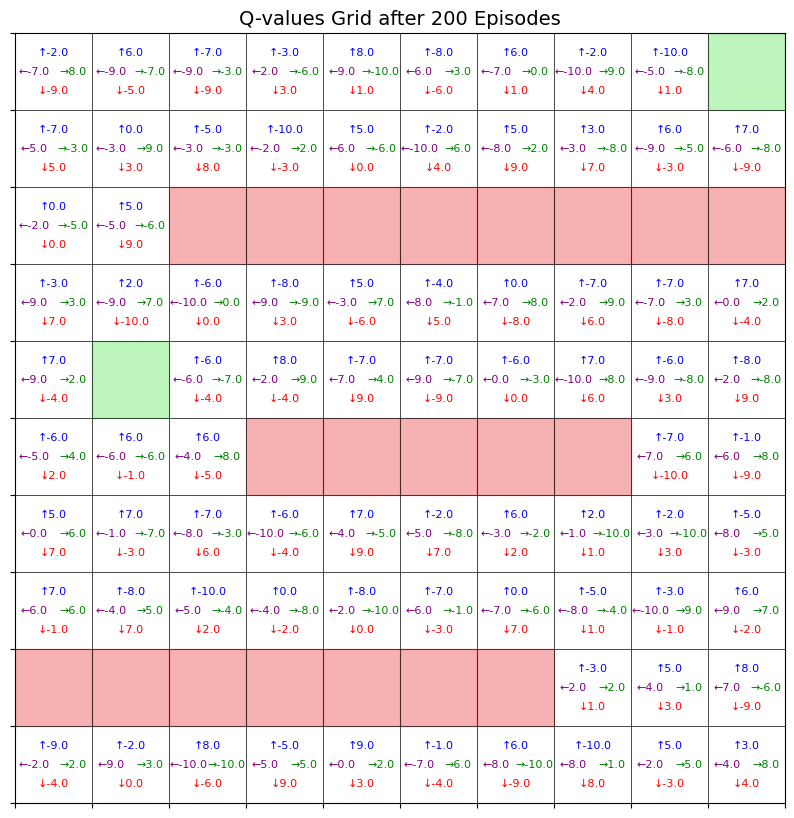

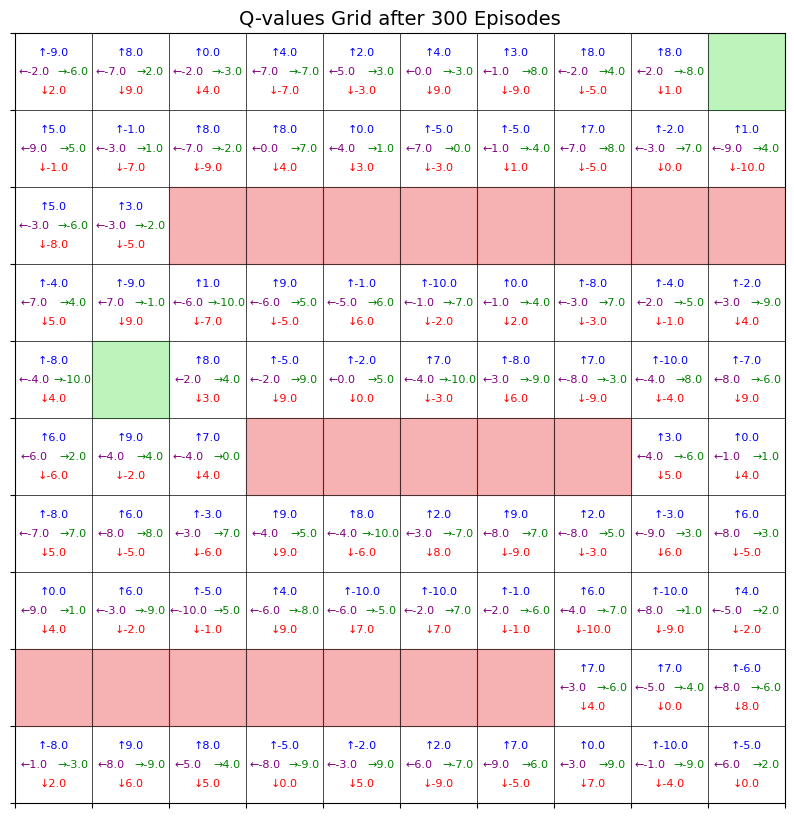

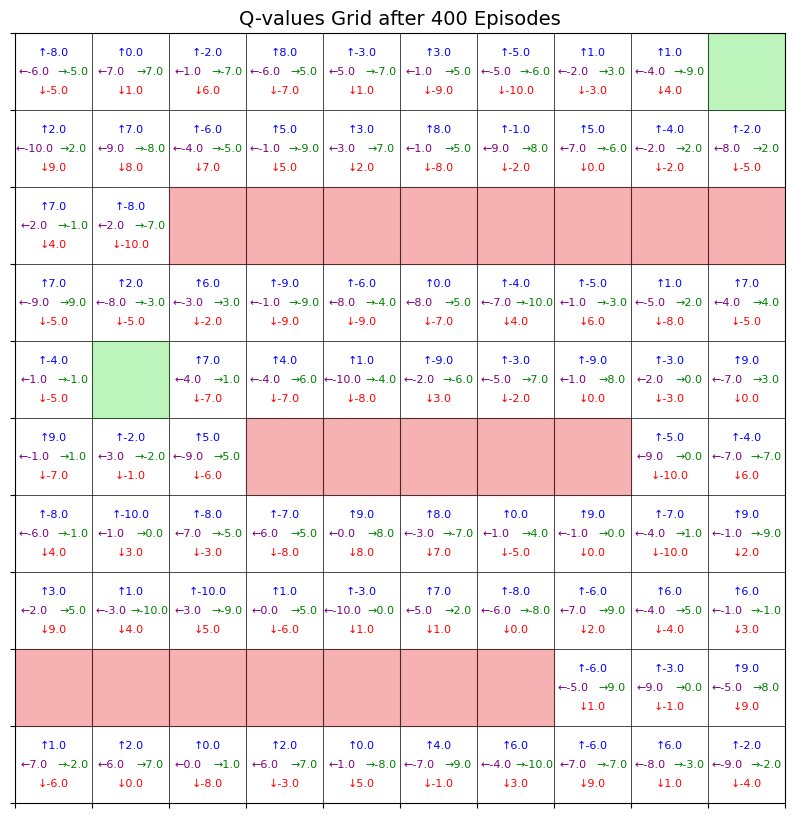

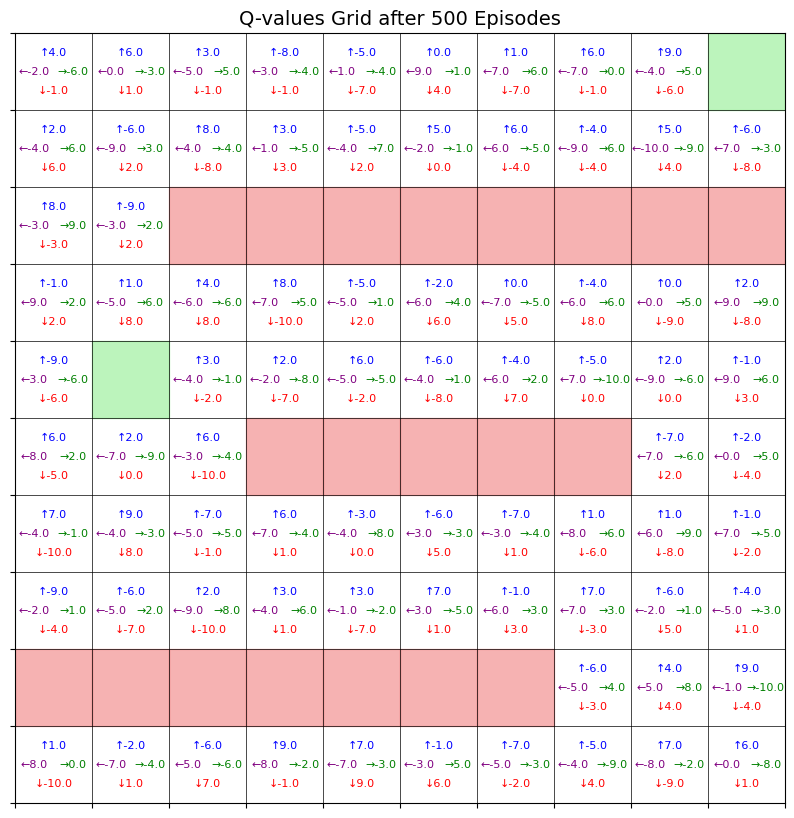

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Grid and cliff specifications
grid_size = (10, 10)
cliffs = [(1, i) for i in range(0, 7)] + [(4, i) for i in range(3, 8)] + [(7, i) for i in range(2, 10)]
exits = [(9, 9), (5, 1)]
episodes = 500
display_interval = 100

# Initialize Q-values for each state and action
q_values_sample = {(i, j): np.zeros(4) for i in range(grid_size[0]) for j in range(grid_size[1])}

# Sample random Q-values for illustration (replace with actual algorithm Q-values during training)
np.random.seed(0)
for (i, j) in q_values_sample:
    if (i, j) not in cliffs and (i, j) not in exits:
        q_values_sample[(i, j)] = np.random.randint(-10, 10, size=4)

# Function to plot Q-values on grid
def plot_q_values(Q, grid_size=(10, 10), episode=0):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Set grid limits and draw lines
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Highlight cliffs and exits with rectangles and prevent Q-values display in these cells
    for (x, y) in cliffs:
        ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightcoral', alpha=0.6))
    for (x, y) in exits:
        ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightgreen', alpha=0.6))

    # Plot Q-values in each cell, excluding cliffs and exits
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) not in cliffs and (i, j) not in exits:
                up, right, down, left = Q[(i, j)]

                # Display directional Q-values with larger fonts and colors
                ax.text(j, i + 0.25, f"↑{up:.1f}", ha='center', va='center', fontsize=8, color='blue')
                ax.text(j + 0.25, i, f"→{right:.1f}", ha='center', va='center', fontsize=8, color='green')
                ax.text(j, i - 0.25, f"↓{down:.1f}", ha='center', va='center', fontsize=8, color='red')
                ax.text(j - 0.25, i, f"←{left:.1f}", ha='center', va='center', fontsize=8, color='purple')

    # Add title and set aspect ratio
    plt.title(f"Q-values Grid after {episode} Episodes", fontsize=14)
    ax.set_aspect('equal')
    plt.show()

# Simulation of Q-value updates every 100 episodes for 500 episodes
for ep in range(0, episodes + 1, display_interval):
    # Simulate Q-values update for demonstration
    for (i, j) in q_values_sample:
        if (i, j) not in cliffs and (i, j) not in exits:
            q_values_sample[(i, j)] = np.random.randint(-10, 10, size=4)  # Replace with actual Q-learning updates
    plot_q_values(q_values_sample, grid_size=grid_size, episode=ep)


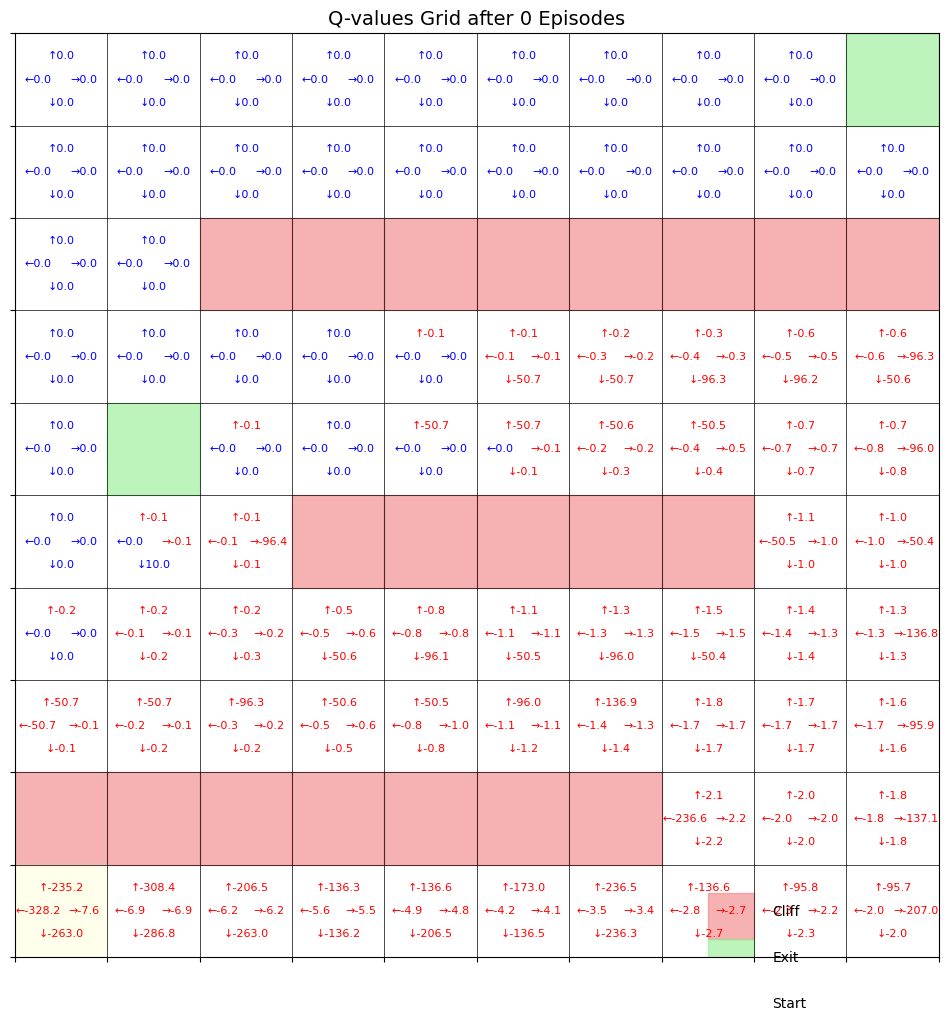

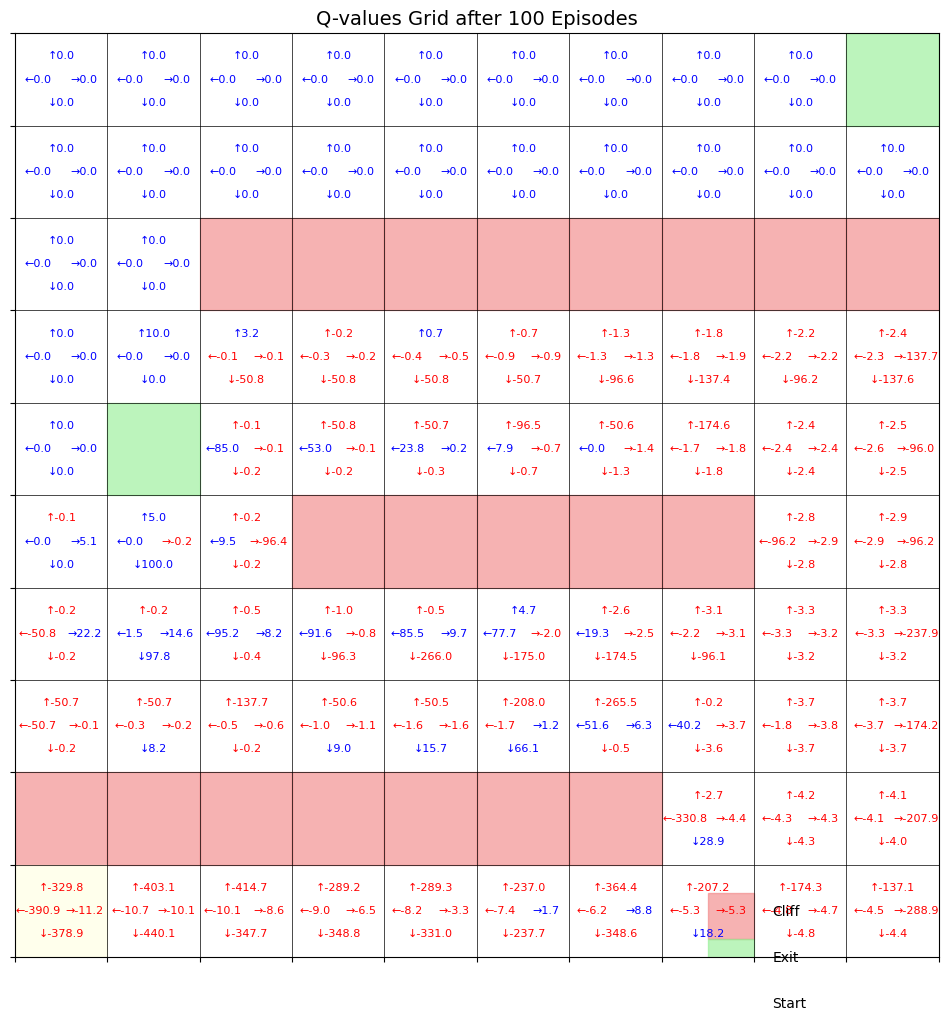

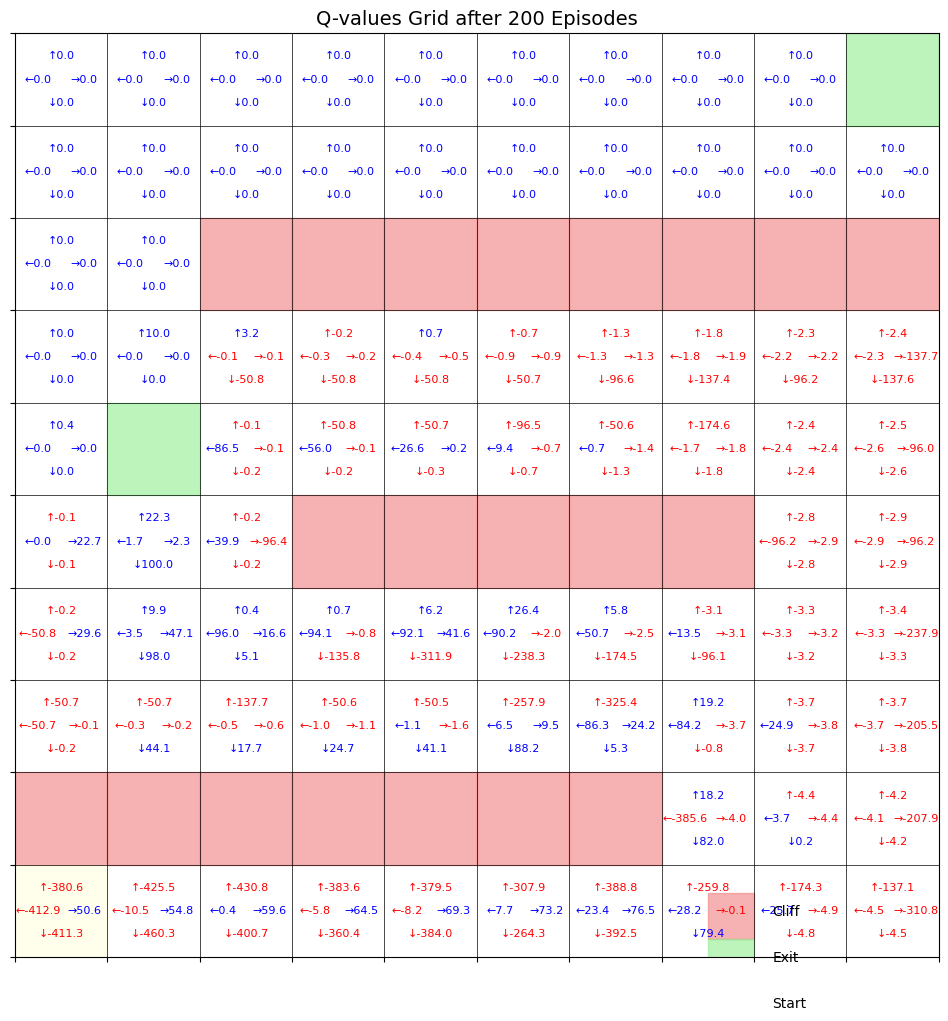

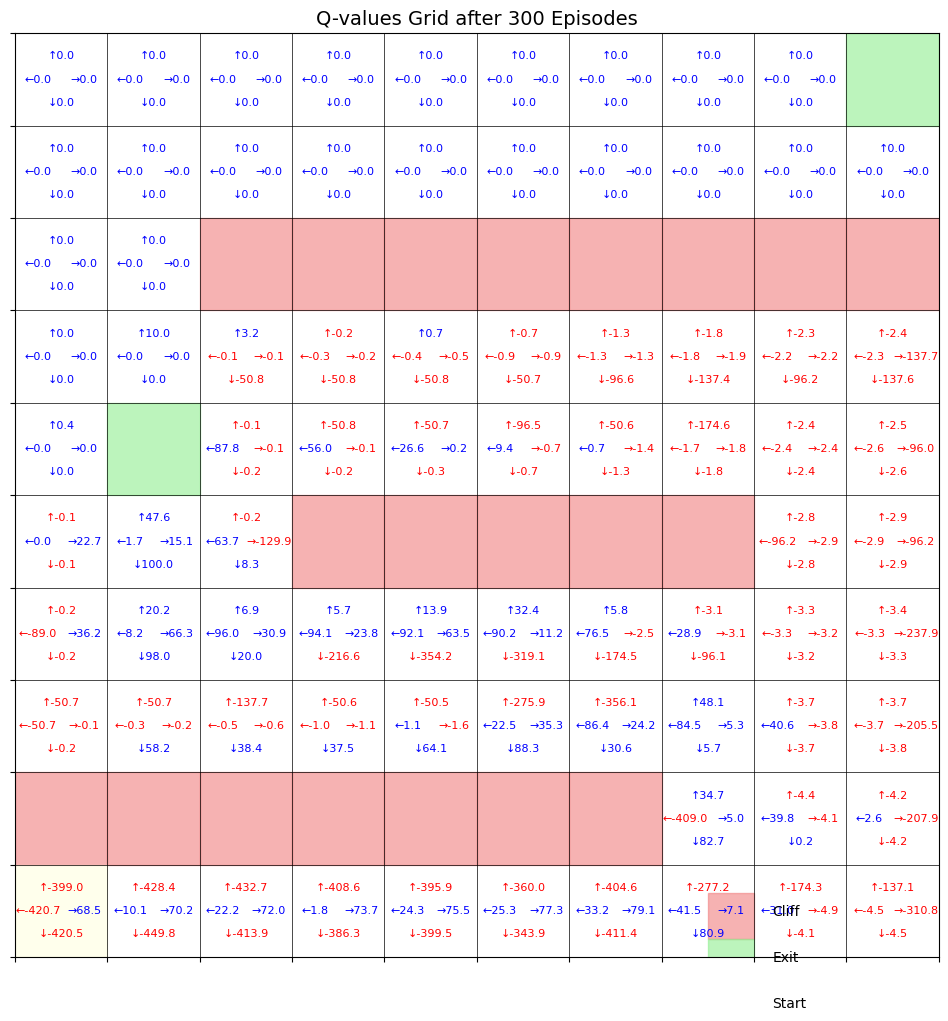

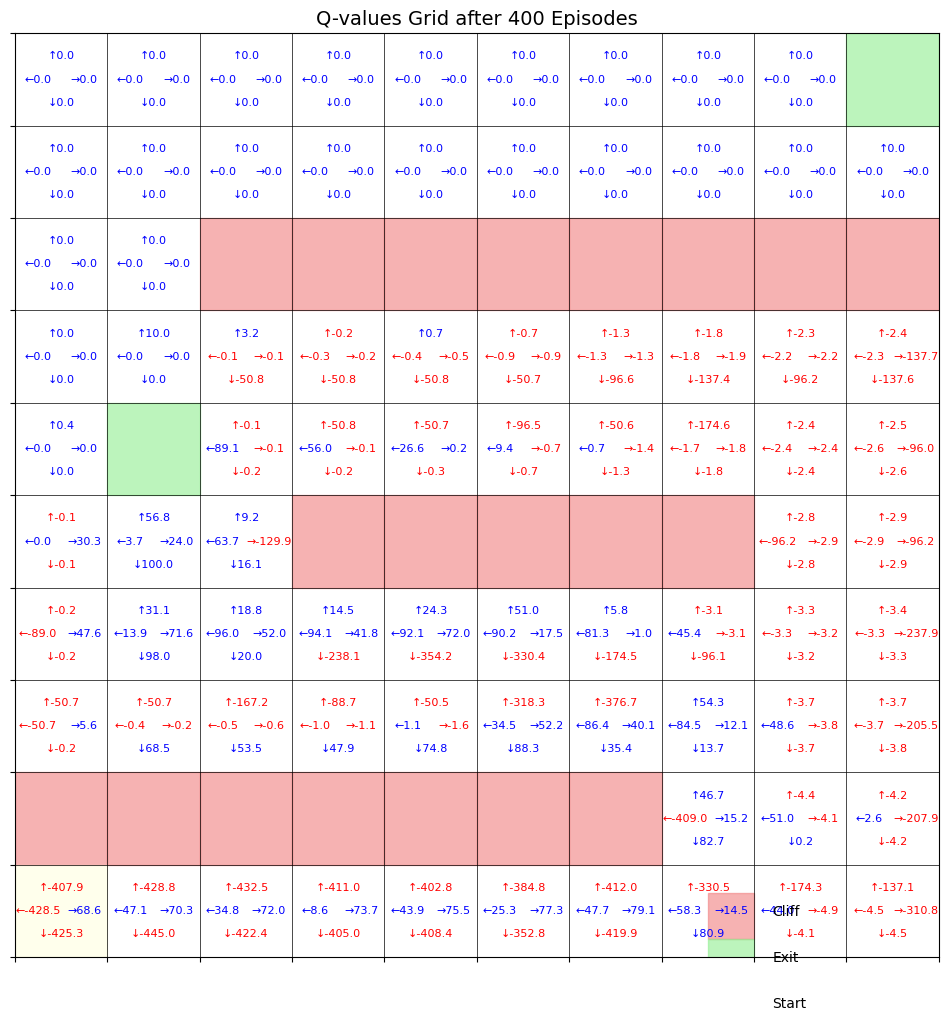

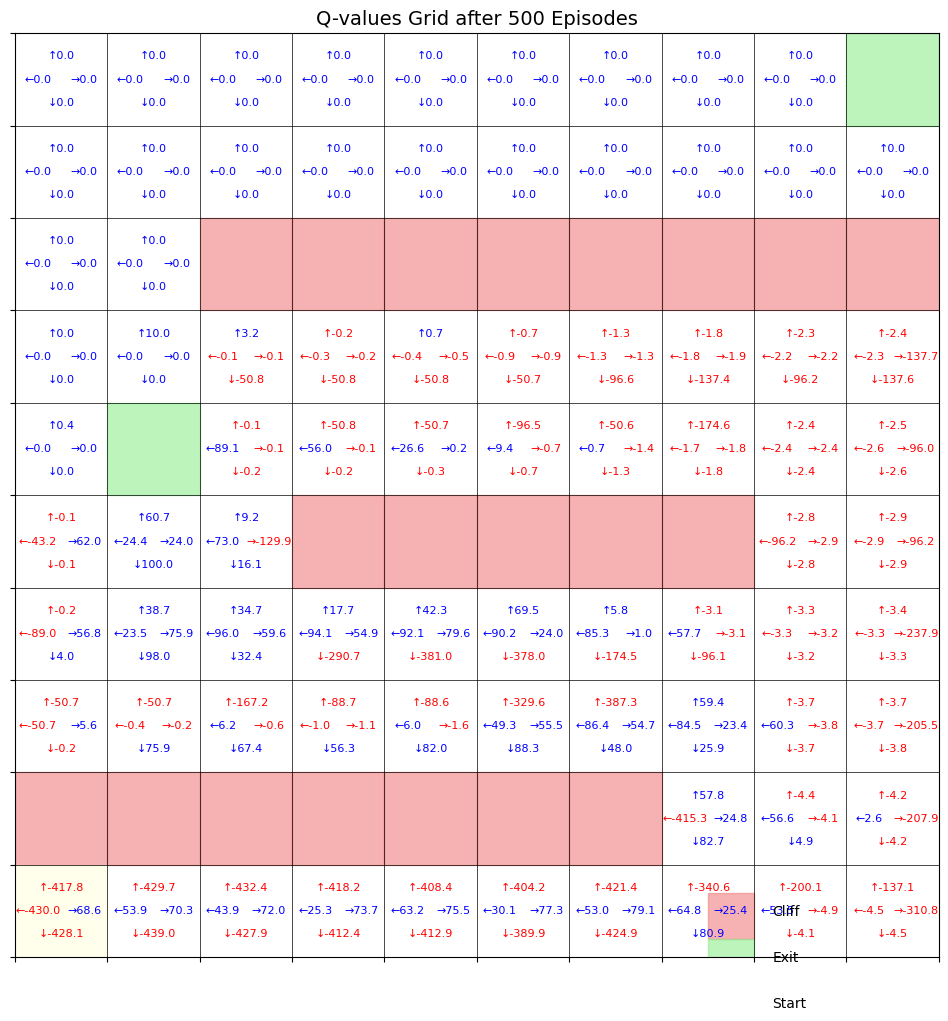

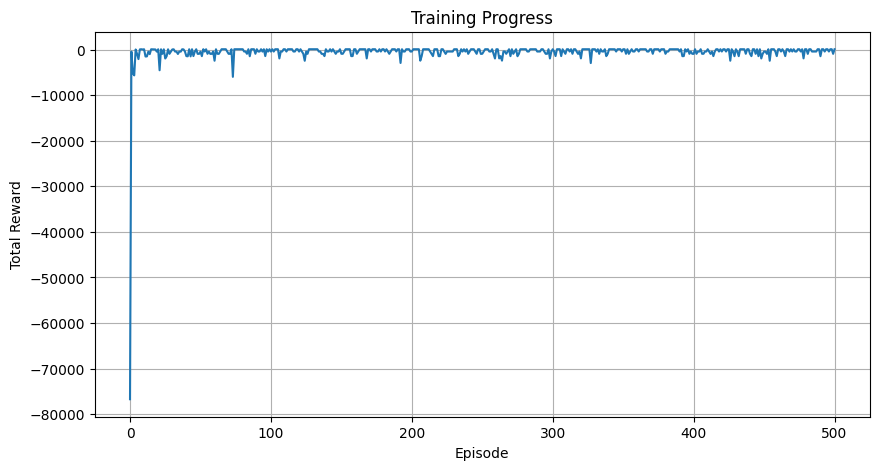

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Grid and cliff specifications
grid_size = (10, 10)
start_pos = (0, 0)  # Starting position
cliffs = [(1, i) for i in range(0, 7)] + [(4, i) for i in range(3, 8)] + [(7, i) for i in range(2, 10)]
exits = [(9, 9), (5, 1)]
episodes = 500
display_interval = 100

# Action mappings
ACTIONS = {
    0: (-1, 0),  # up
    1: (0, 1),   # right
    2: (1, 0),   # down
    3: (0, -1)   # left
}

class CliffWalkingEnv:
    def __init__(self, grid_size, start_pos, cliffs, exits):
        self.grid_size = grid_size
        self.start_pos = start_pos
        self.cliffs = cliffs
        self.exits = exits
        self.current_pos = start_pos

    def is_valid_position(self, pos):
        """Check if position is within grid boundaries"""
        return 0 <= pos[0] < self.grid_size[0] and 0 <= pos[1] < self.grid_size[1]

    def step(self, action):
        """
        Take action and return new state, reward, and done flag
        """
        # Calculate new position
        move = ACTIONS[action]
        new_pos = (self.current_pos[0] + move[0], self.current_pos[1] + move[1])

        # Check if move is out of bounds or hits cliff
        if not self.is_valid_position(new_pos) or new_pos in self.cliffs:
            reward = -500
            self.current_pos = self.start_pos
            return self.current_pos, reward, False

        # Check if reached exit
        if new_pos in self.exits:
            reward = 100
            self.current_pos = new_pos
            return new_pos, reward, True

        # Regular move
        reward = -1
        self.current_pos = new_pos
        return new_pos, reward, False

    def reset(self):
        """Reset environment to starting state"""
        self.current_pos = self.start_pos
        return self.start_pos

class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
        self.q_table = {(i, j): np.zeros(action_size)
                       for i in range(state_size[0])
                       for j in range(state_size[1])}
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.randint(0, 4)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state):
        best_next_value = np.max(self.q_table[next_state])
        current_q = self.q_table[state][action]
        self.q_table[state][action] = current_q + self.lr * (
            reward + self.gamma * best_next_value - current_q)

def plot_q_values(Q, grid_size=(10, 10), episode=0, cliffs=[], exits=[]):
    fig, ax = plt.subplots(figsize=(12, 12))

    # Set grid limits and draw lines
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Highlight cliffs, exits, and start position
    for (x, y) in cliffs:
        ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightcoral', alpha=0.6))
    for (x, y) in exits:
        ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightgreen', alpha=0.6))
    ax.add_patch(plt.Rectangle((-0.5, -0.5), 1, 1, color='lightyellow', alpha=0.6))  # Start position

    # Plot Q-values in each cell
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) not in cliffs and (i, j) not in exits:
                up, right, down, left = Q[(i, j)]

                # Use different colors for positive and negative values
                def get_color(value):
                    return 'blue' if value >= 0 else 'red'

                # Display directional Q-values
                ax.text(j, i + 0.25, f"↑{up:.1f}", ha='center', va='center',
                       fontsize=8, color=get_color(up))
                ax.text(j + 0.25, i, f"→{right:.1f}", ha='center', va='center',
                       fontsize=8, color=get_color(right))
                ax.text(j, i - 0.25, f"↓{down:.1f}", ha='center', va='center',
                       fontsize=8, color=get_color(down))
                ax.text(j - 0.25, i, f"←{left:.1f}", ha='center', va='center',
                       fontsize=8, color=get_color(left))

    # Add legend
    ax.add_patch(plt.Rectangle((grid_size[1]-3, -0.3), 0.5, 0.5, color='lightcoral', alpha=0.6))
    ax.add_patch(plt.Rectangle((grid_size[1]-3, -0.8), 0.5, 0.5, color='lightgreen', alpha=0.6))
    ax.add_patch(plt.Rectangle((grid_size[1]-3, -1.3), 0.5, 0.5, color='lightyellow', alpha=0.6))
    ax.text(grid_size[1]-2.3, -0.05, 'Cliff', fontsize=10)
    ax.text(grid_size[1]-2.3, -0.55, 'Exit', fontsize=10)
    ax.text(grid_size[1]-2.3, -1.05, 'Start', fontsize=10)

    plt.title(f"Q-values Grid after {episode} Episodes", fontsize=14)
    ax.set_aspect('equal')
    plt.show()

# Initialize environment and agent
env = CliffWalkingEnv(grid_size, start_pos, cliffs, exits)
agent = QLearningAgent(grid_size, len(ACTIONS))

# Training loop with visualization
episode_rewards = []
for ep in range(episodes + 1):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state)
        state = next_state
        total_reward += reward

    episode_rewards.append(total_reward)

    # Visualize Q-values at display intervals
    if ep % display_interval == 0:
        plot_q_values(agent.q_table, grid_size=grid_size, episode=ep,
                     cliffs=cliffs, exits=exits)

# Plot training progress
plt.figure(figsize=(10, 5))
plt.plot(episode_rewards)
plt.title('Training Progress')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()

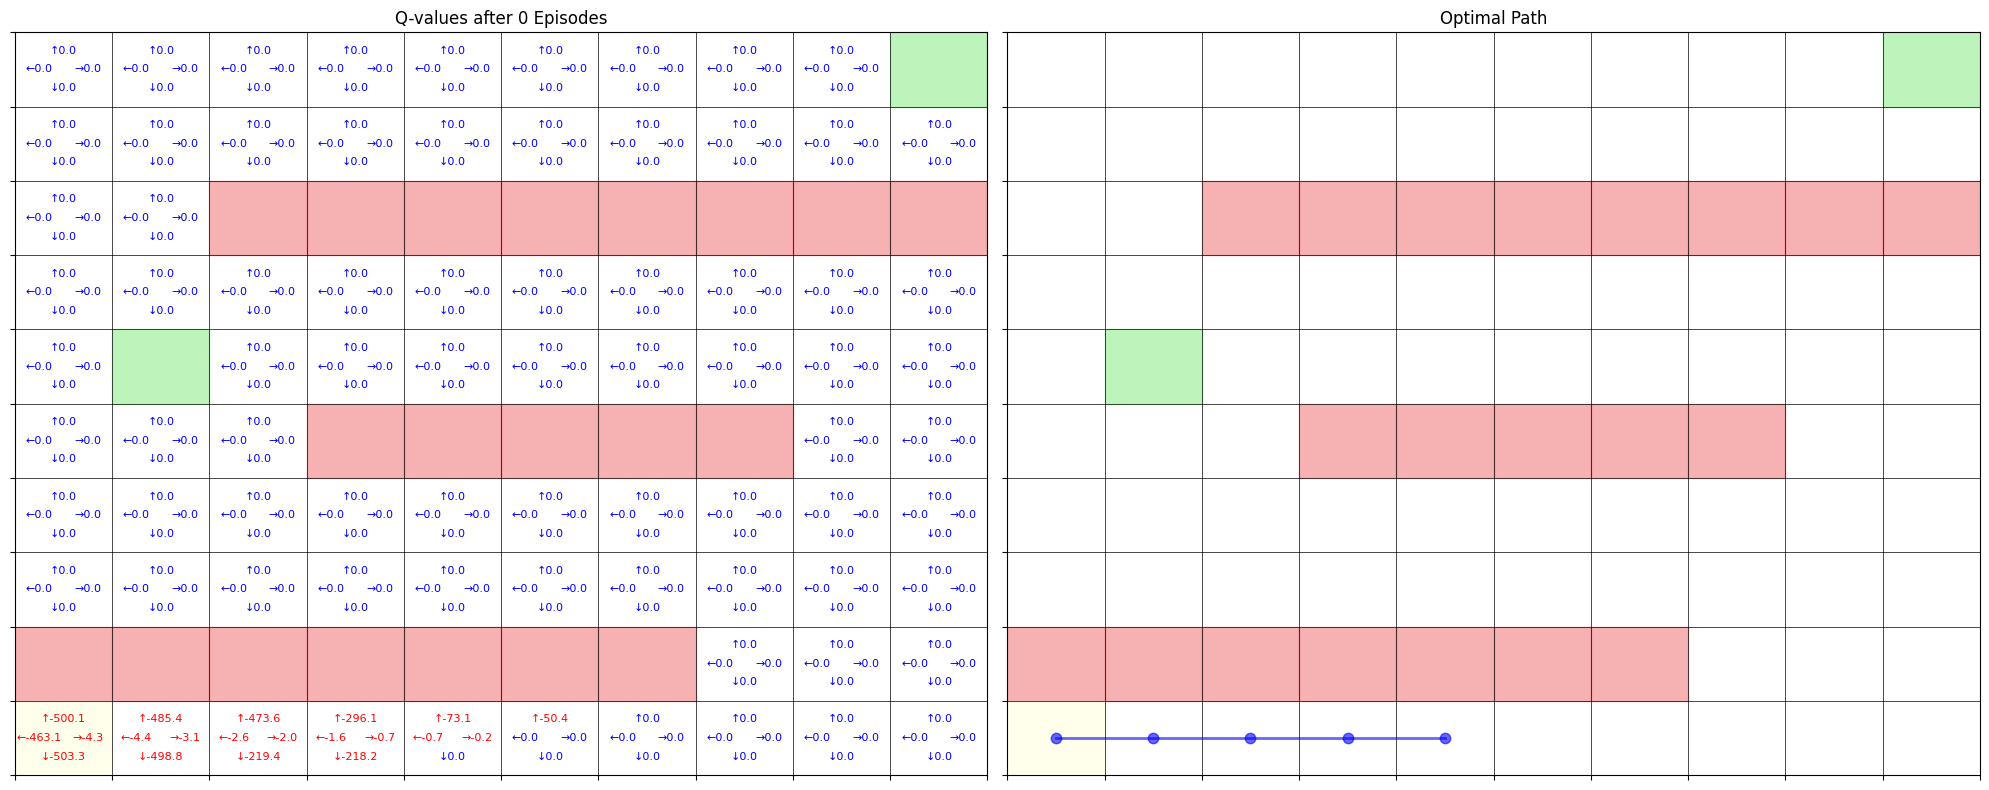

Episode 0/2000
Average Reward (last 100): -45260.60
Epsilon: 0.367
--------------------------------------------------


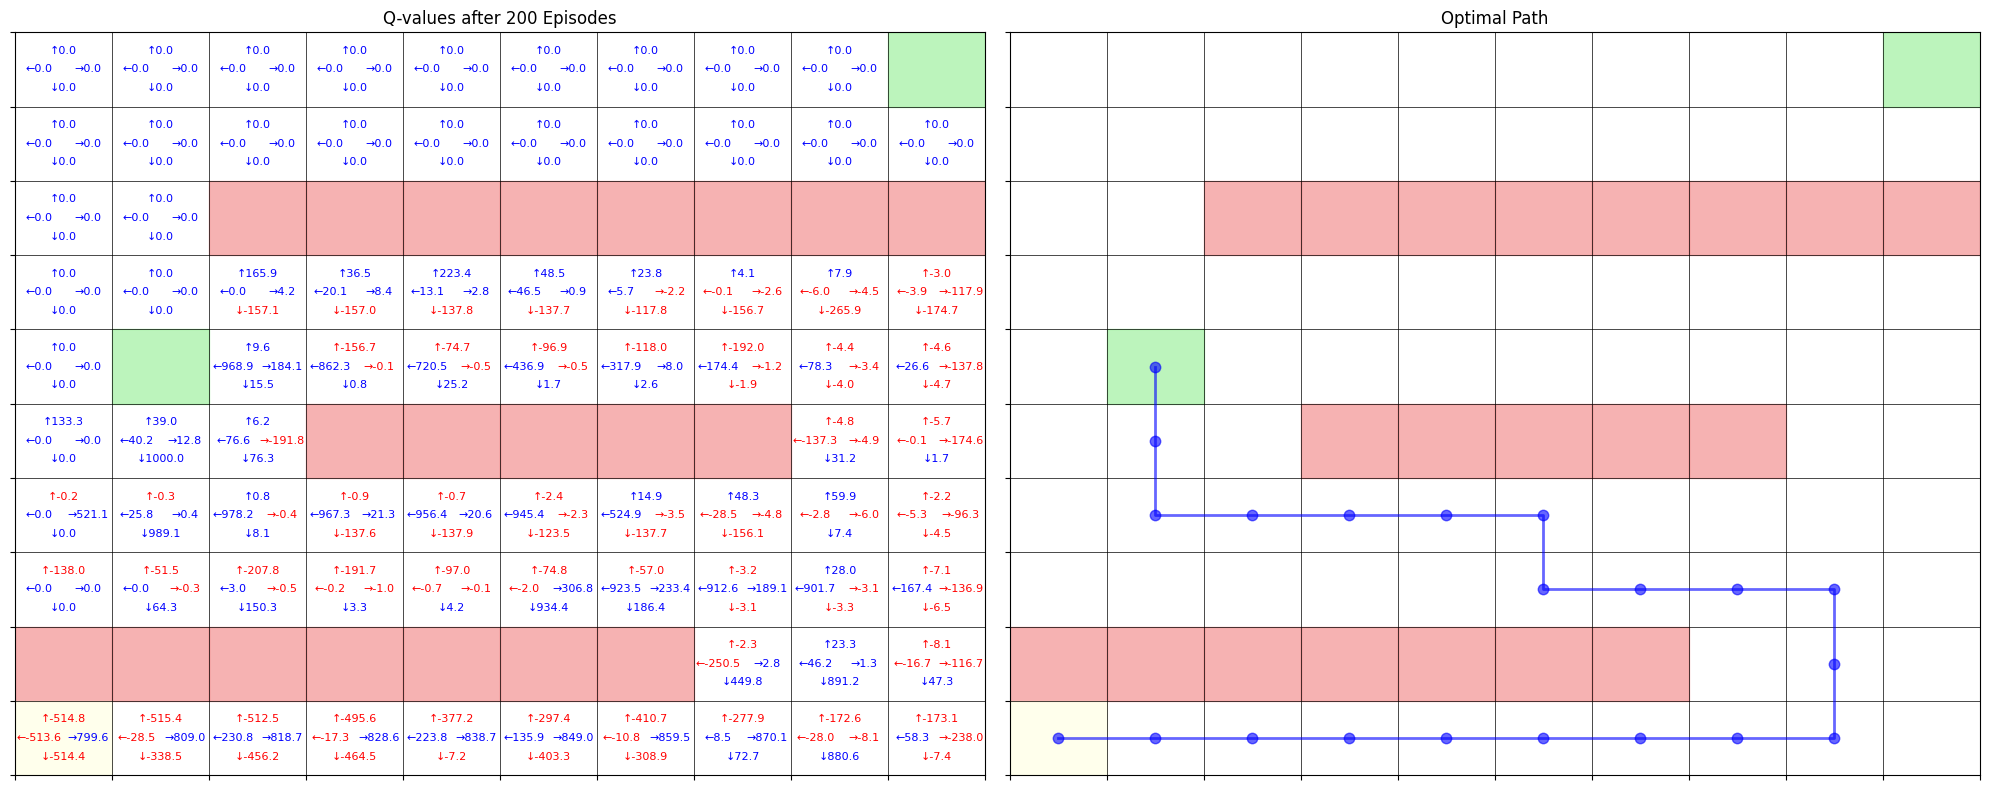

Episode 200/2000
Average Reward (last 100): 950.58
Epsilon: 0.010
--------------------------------------------------


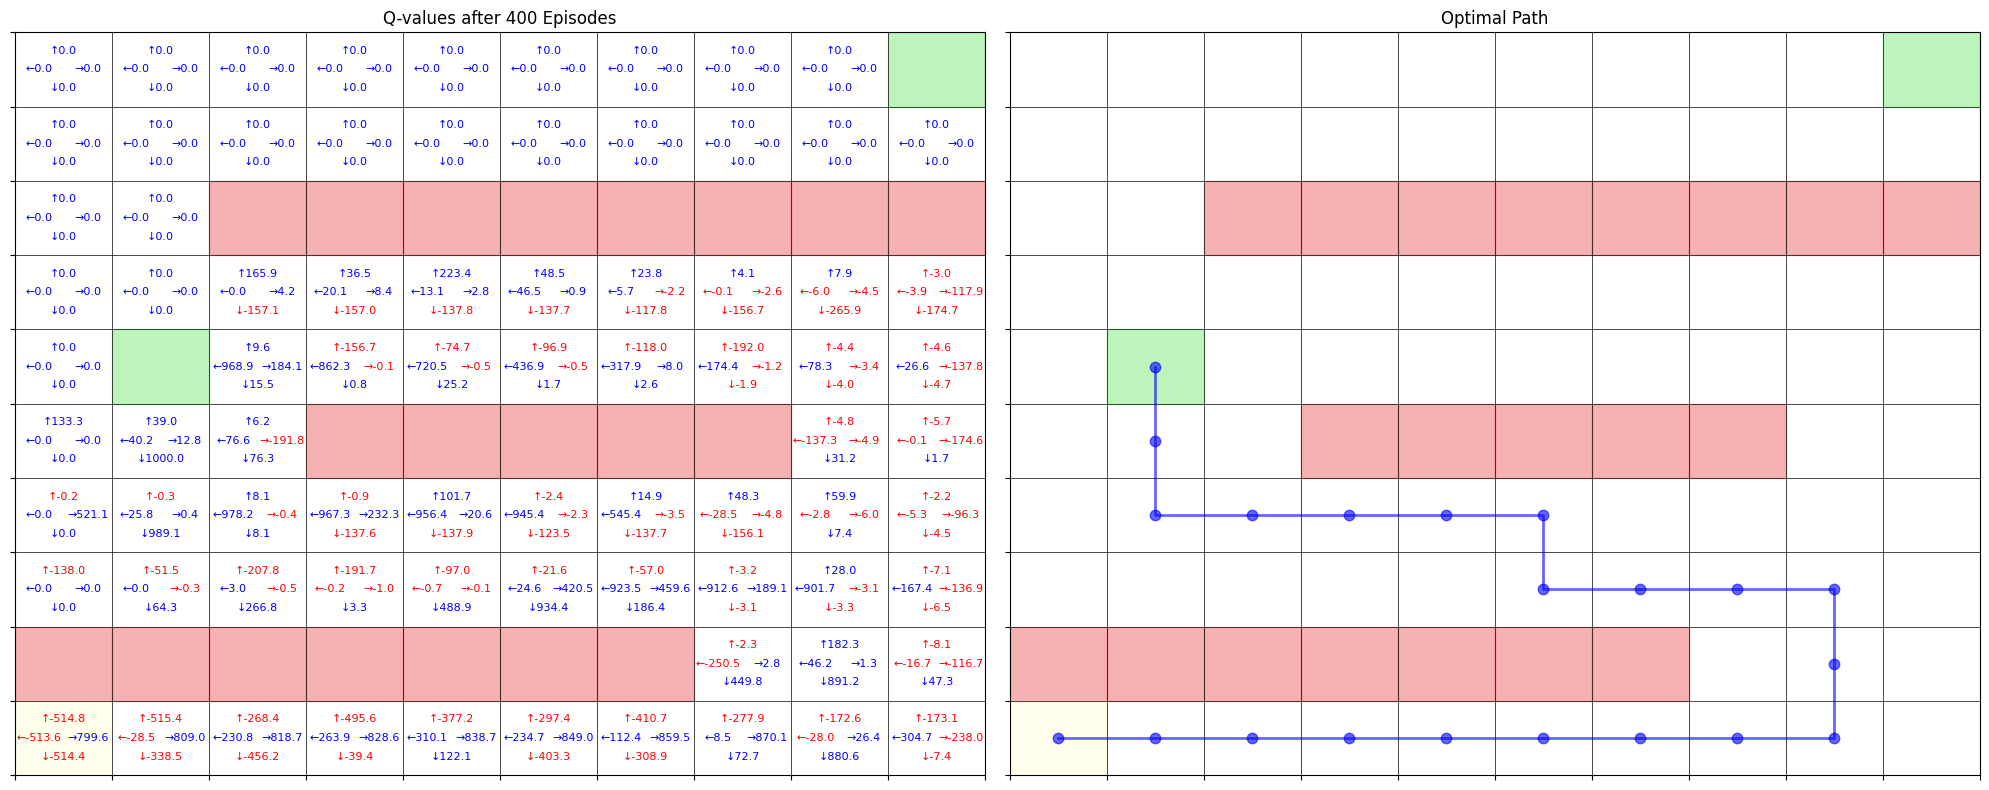

Episode 400/2000
Average Reward (last 100): 965.76
Epsilon: 0.010
--------------------------------------------------


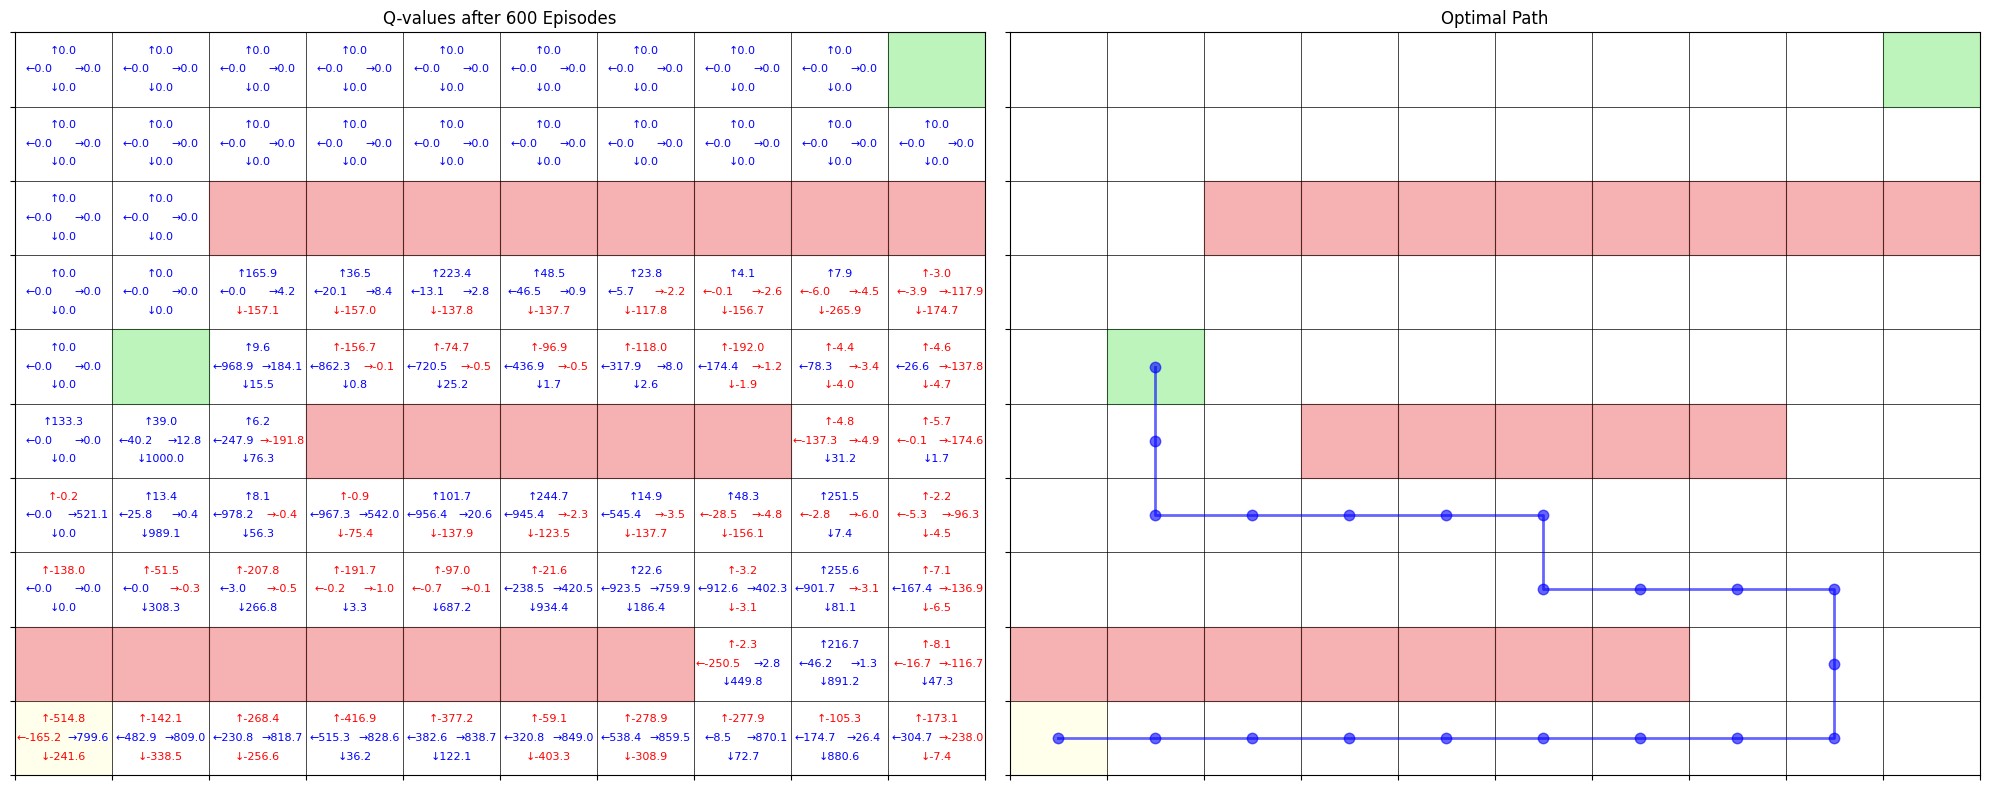

Episode 600/2000
Average Reward (last 100): 925.14
Epsilon: 0.010
--------------------------------------------------


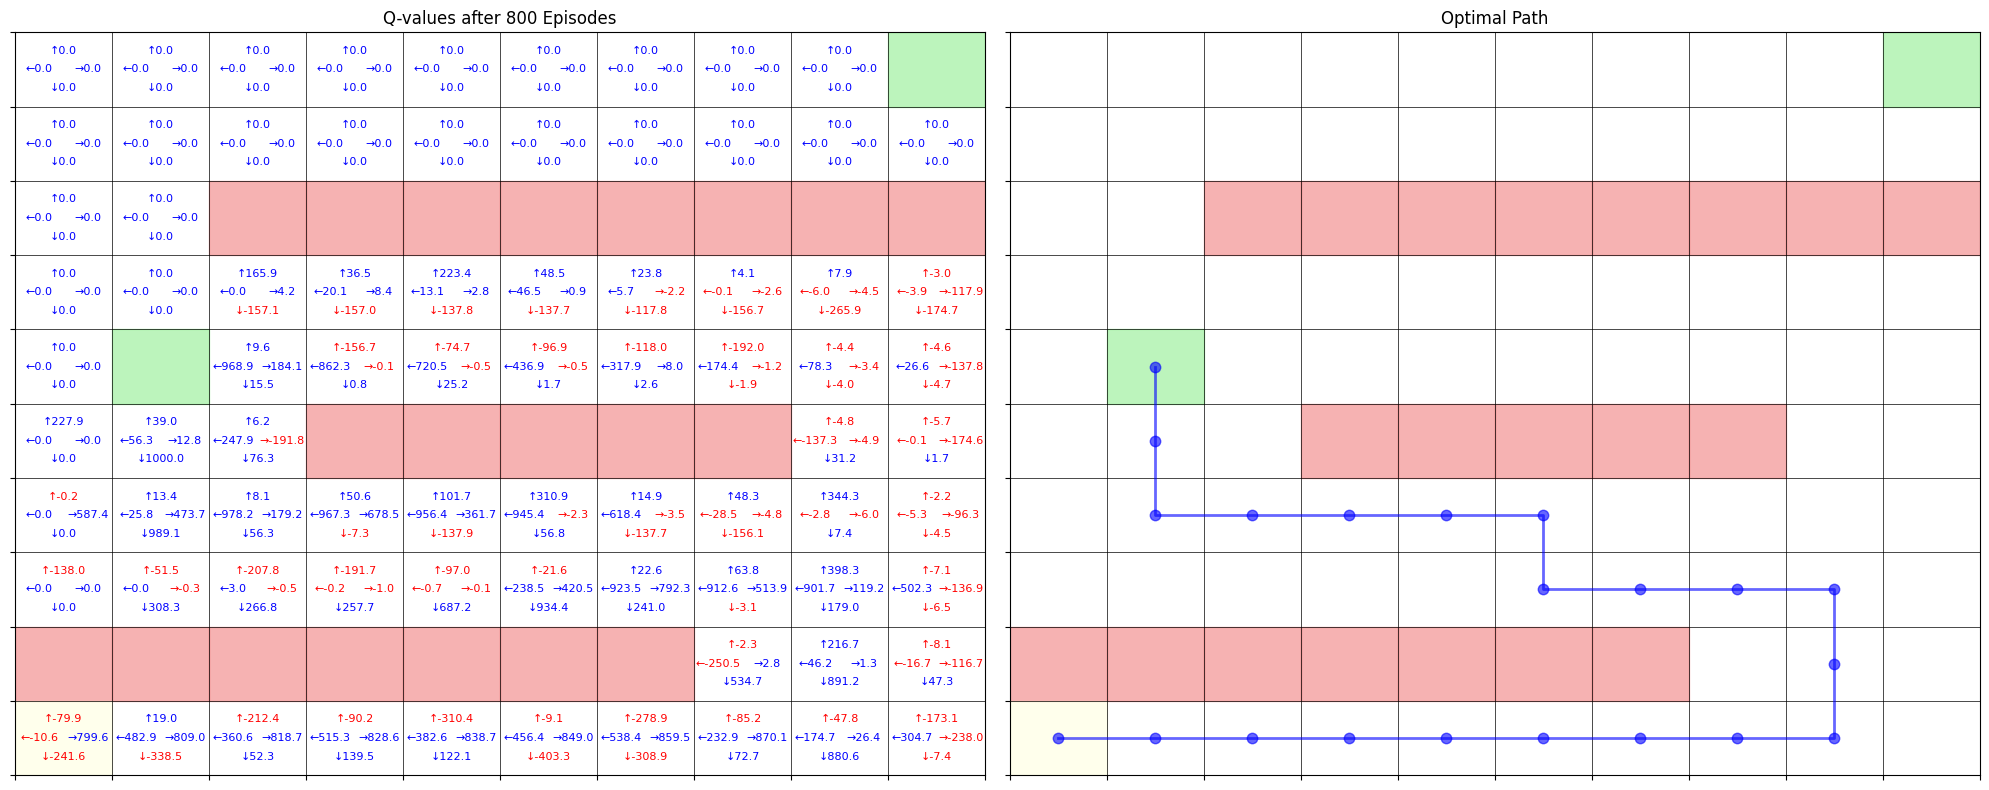

Episode 800/2000
Average Reward (last 100): 925.41
Epsilon: 0.010
--------------------------------------------------


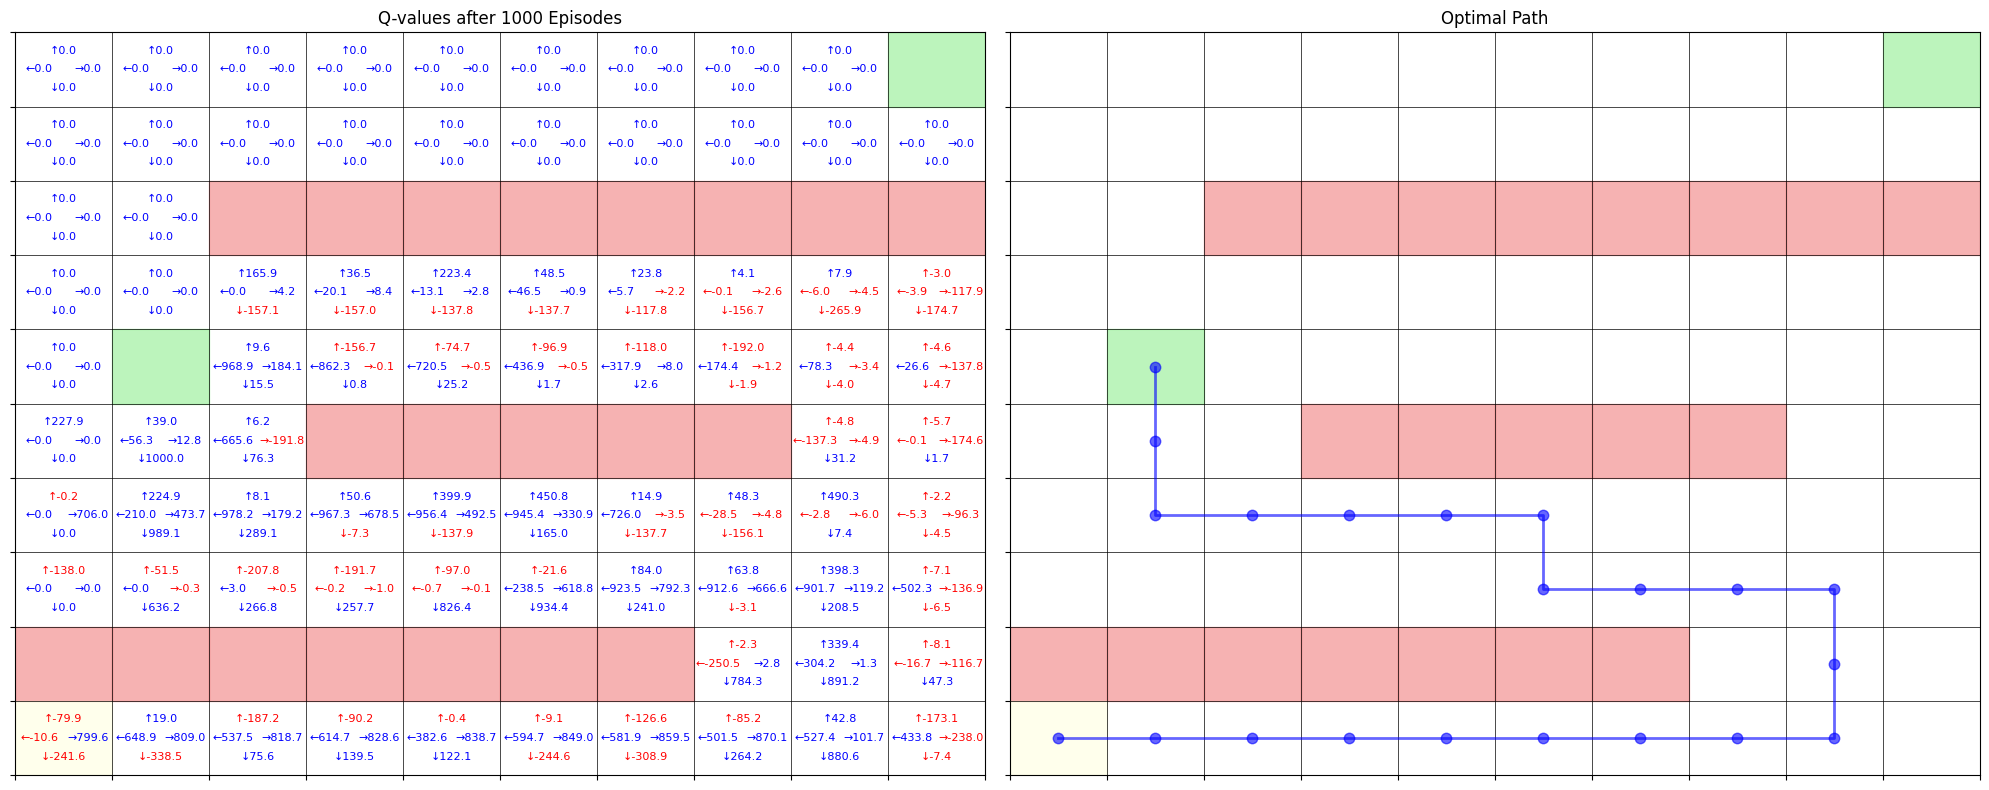

Episode 1000/2000
Average Reward (last 100): 960.24
Epsilon: 0.010
--------------------------------------------------


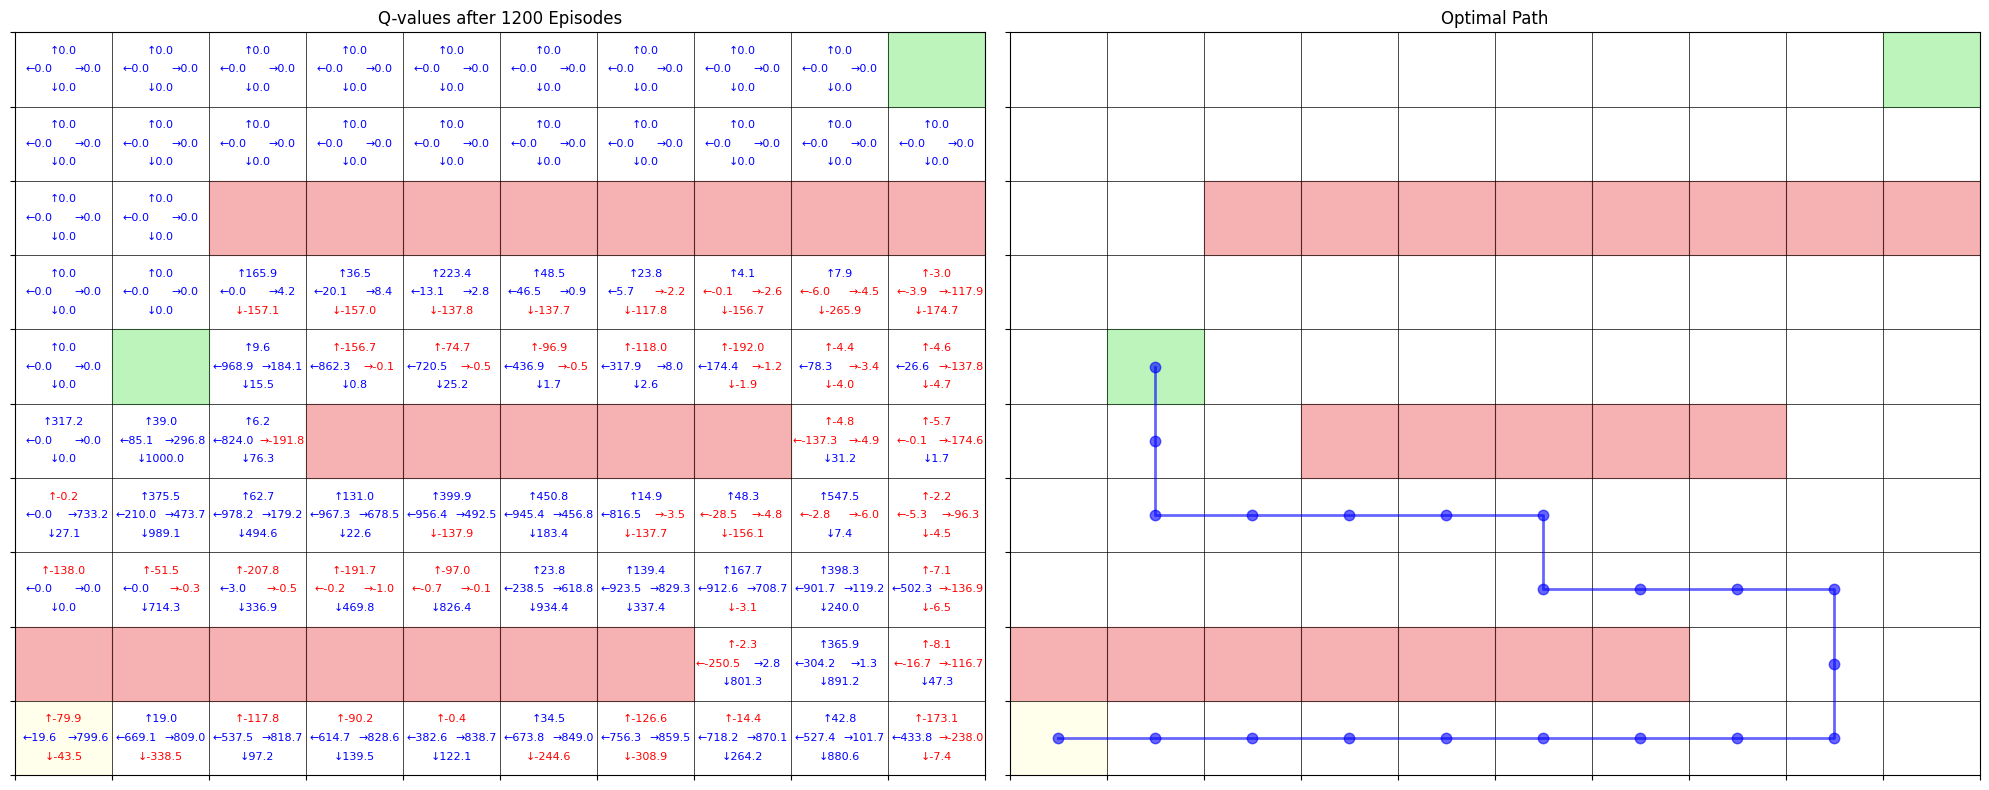

Episode 1200/2000
Average Reward (last 100): 929.95
Epsilon: 0.010
--------------------------------------------------


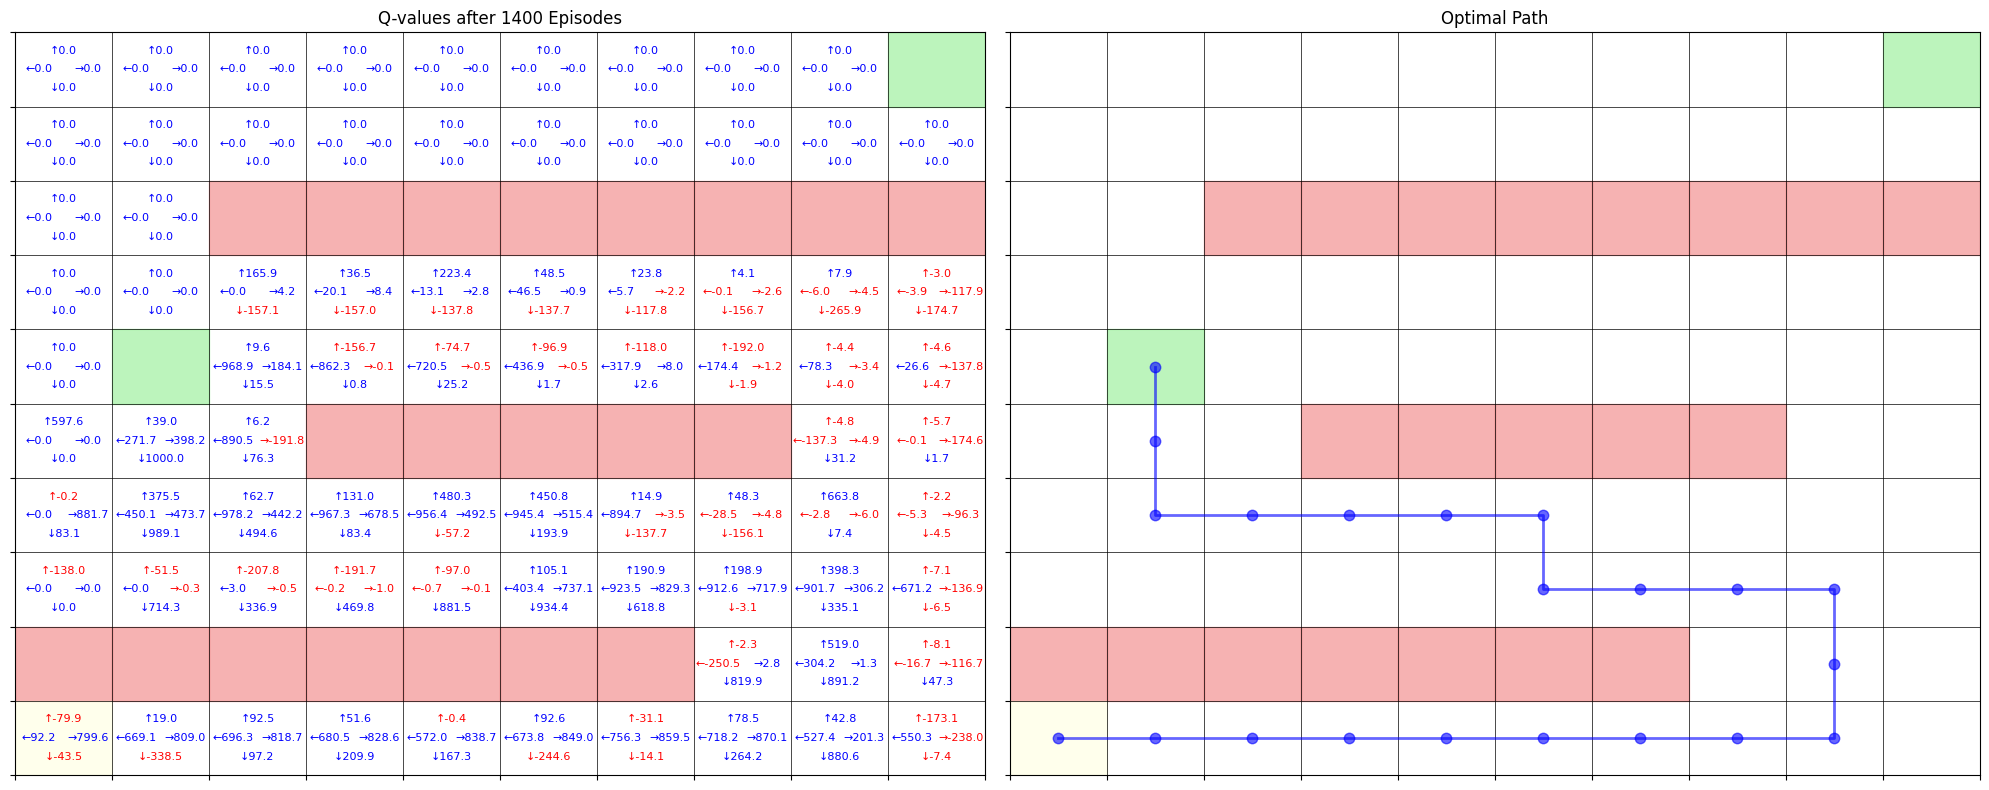

Episode 1400/2000
Average Reward (last 100): 930.07
Epsilon: 0.010
--------------------------------------------------


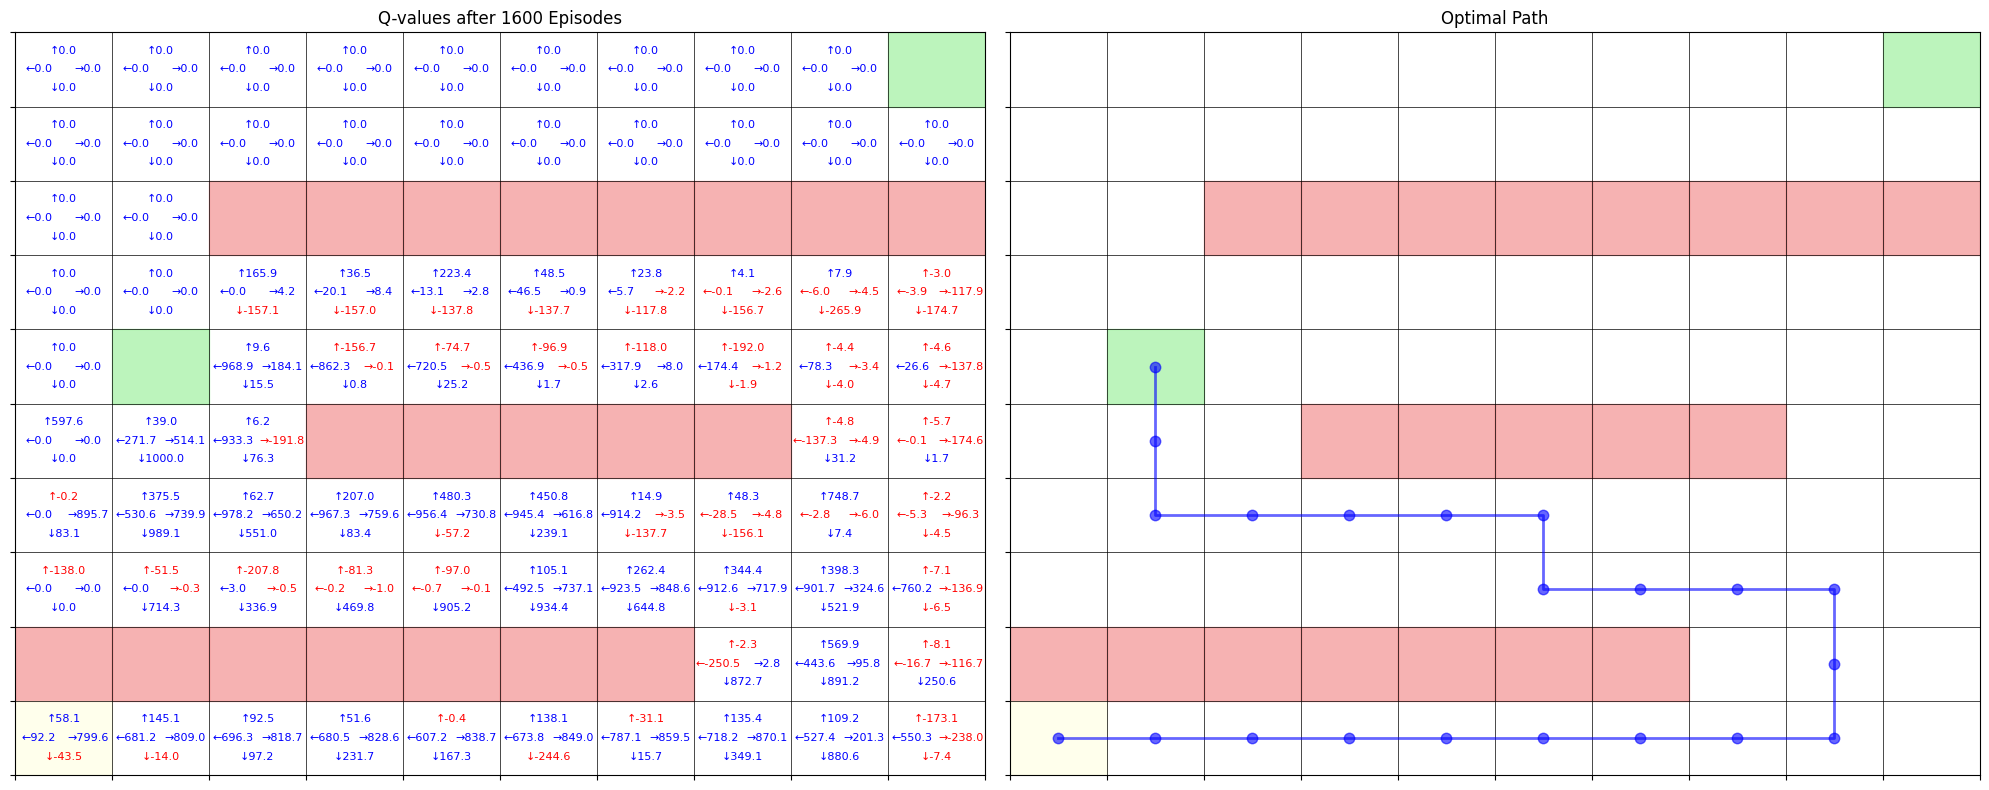

Episode 1600/2000
Average Reward (last 100): 945.19
Epsilon: 0.010
--------------------------------------------------


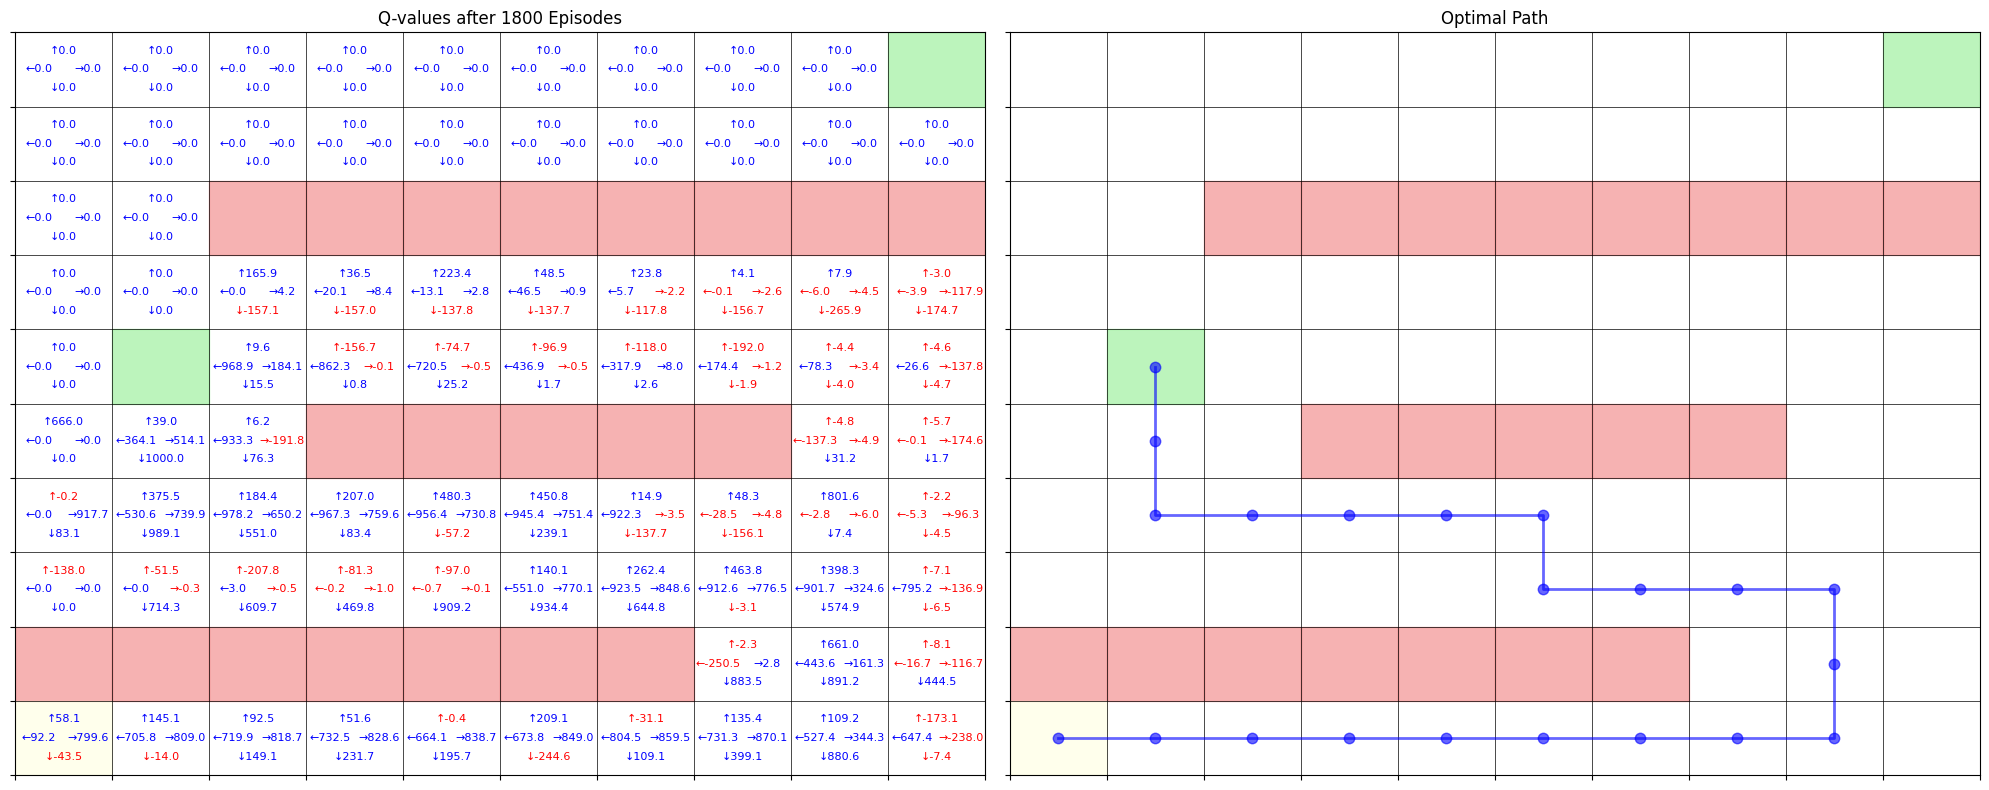

Episode 1800/2000
Average Reward (last 100): 955.49
Epsilon: 0.010
--------------------------------------------------


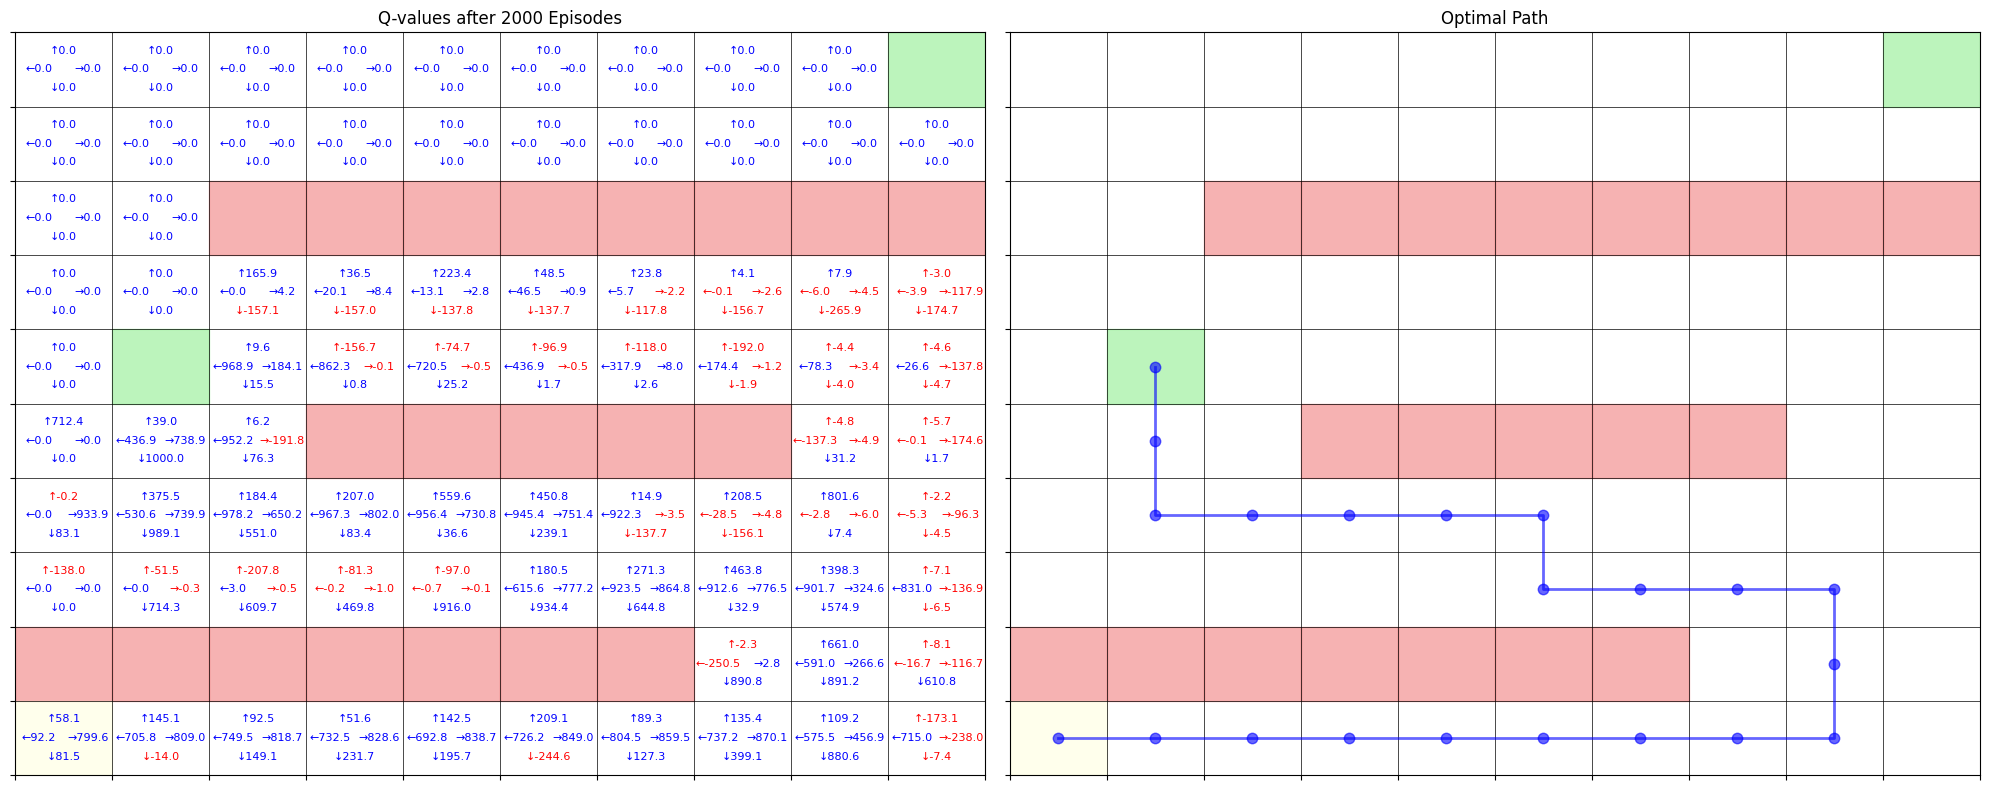

Episode 2000/2000
Average Reward (last 100): 929.91
Epsilon: 0.010
--------------------------------------------------


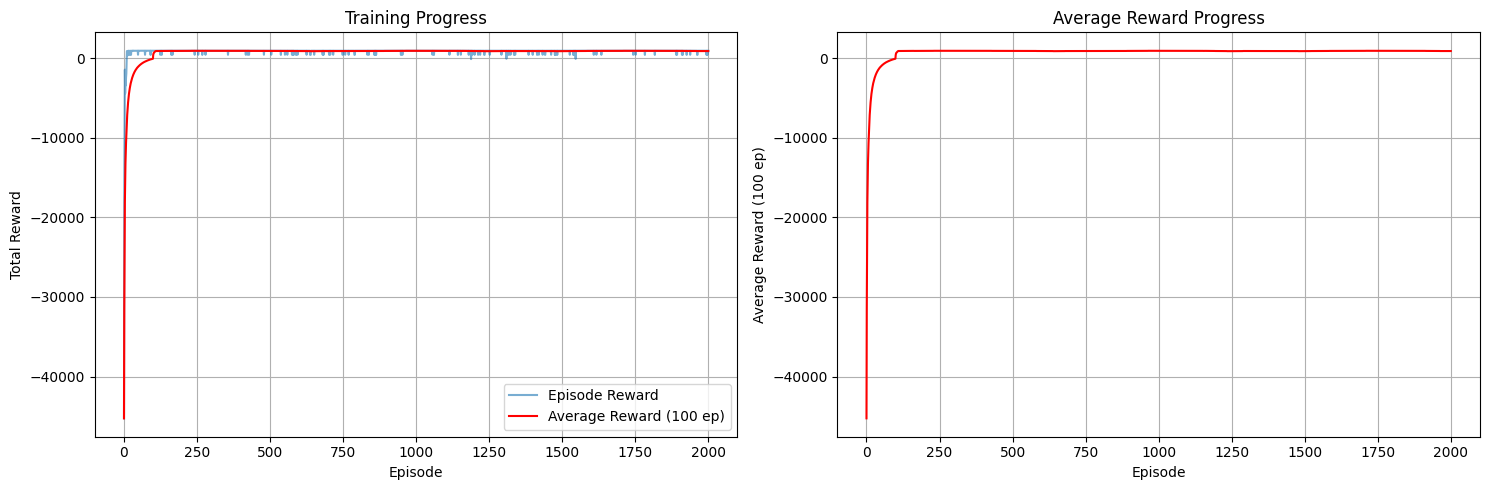

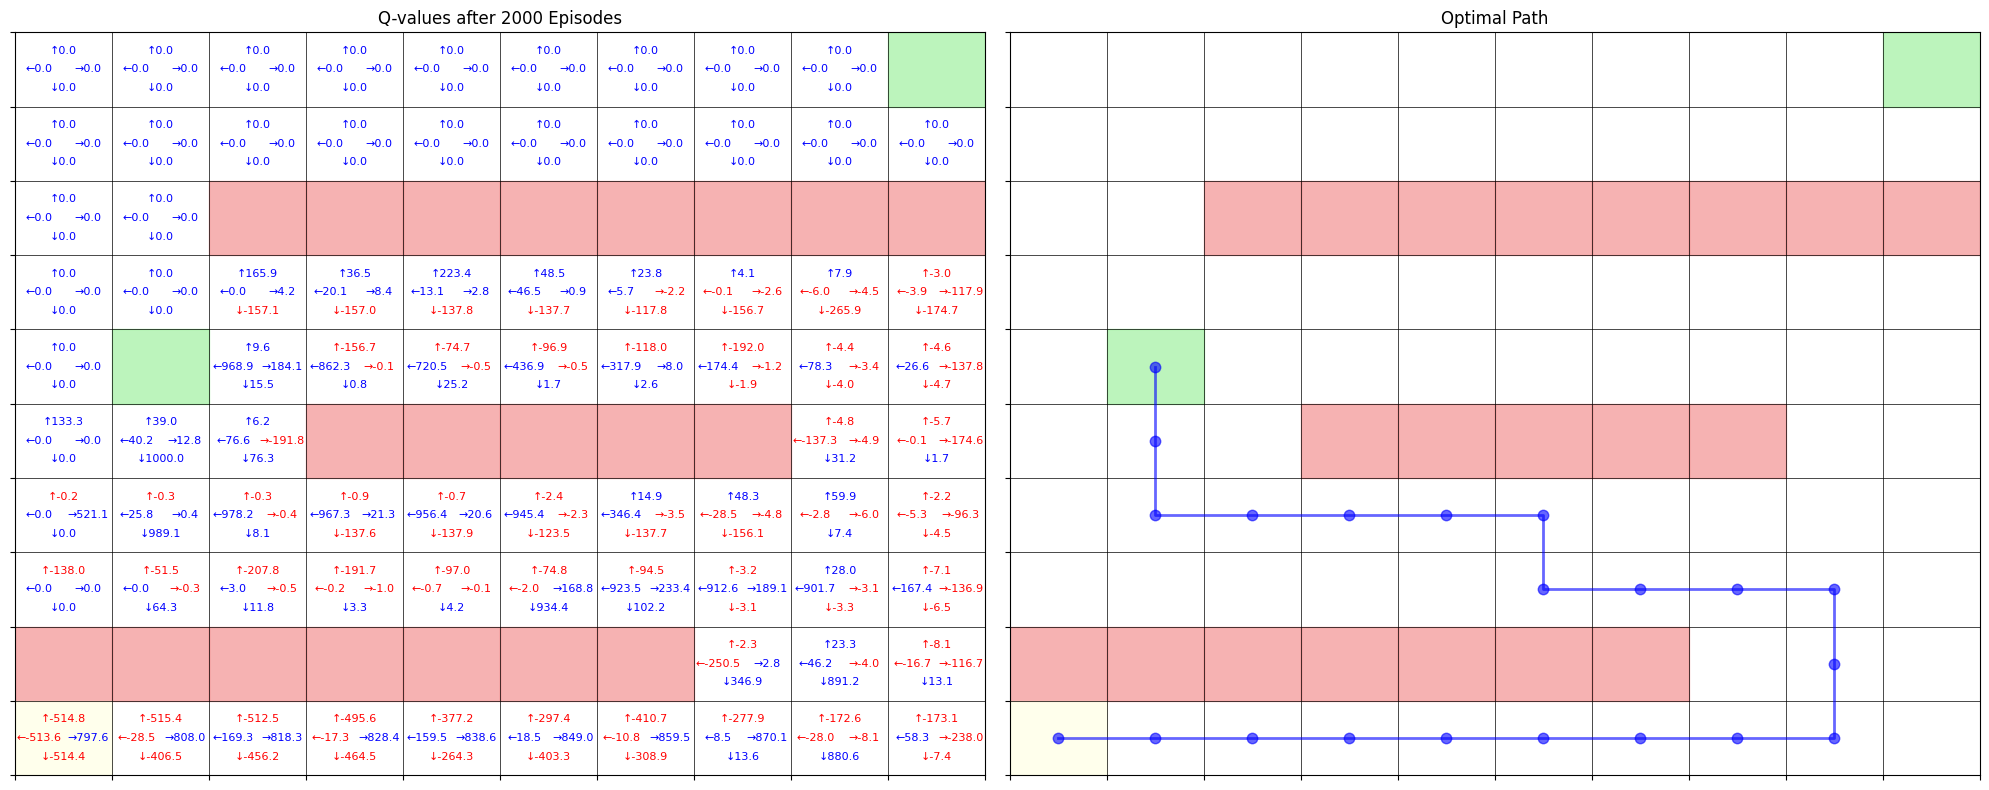

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import seaborn as sns

# Grid and cliff specifications
grid_size = (10, 10)
start_pos = (0, 0)
cliffs = [(1, i) for i in range(0, 7)] + [(4, i) for i in range(3, 8)] + [(7, i) for i in range(2, 10)]
exits = [(9, 9), (5, 1)]
episodes = 500  # Increased episodes for better learning
display_interval = 200

# Action mappings
ACTIONS = {
    0: (-1, 0),  # up
    1: (0, 1),   # right
    2: (1, 0),   # down
    3: (0, -1)   # left
}

class CliffWalkingEnv:
    def __init__(self, grid_size, start_pos, cliffs, exits):
        self.grid_size = grid_size
        self.start_pos = start_pos
        self.cliffs = cliffs
        self.exits = exits
        self.current_pos = start_pos
        self.steps = 0
        self.max_steps = grid_size[0] * grid_size[1] * 2  # Maximum steps before episode termination

    def is_valid_position(self, pos):
        return 0 <= pos[0] < self.grid_size[0] and 0 <= pos[1] < self.grid_size[1]

    def manhattan_distance(self, pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

    def step(self, action):
        self.steps += 1
        move = ACTIONS[action]
        new_pos = (self.current_pos[0] + move[0], self.current_pos[1] + move[1])

        # Check for termination due to max steps
        if self.steps >= self.max_steps:
            self.current_pos = self.start_pos
            return self.current_pos, -100, True

        # Handle invalid moves
        if not self.is_valid_position(new_pos):
            reward = -500
            self.current_pos = self.start_pos
            return self.current_pos, reward, False

        # Handle cliff falls
        if new_pos in self.cliffs:
            reward = -500
            self.current_pos = self.start_pos
            return self.current_pos, reward, False

        # Handle reaching exits
        if new_pos in self.exits:
            reward = 1000  # Increased reward for reaching goal
            self.current_pos = new_pos
            return new_pos, reward, True

        # Regular move with distance-based reward shaping
        closest_exit_dist = min(self.manhattan_distance(new_pos, exit_pos) for exit_pos in self.exits)
        reward = -1 - (closest_exit_dist * 0.1)  # Basic step penalty plus distance penalty

        # Additional reward for moving away from cliffs
        min_cliff_dist = min((self.manhattan_distance(new_pos, cliff) for cliff in self.cliffs), default=0)
        reward += min_cliff_dist * 0.1  # Small bonus for staying away from cliffs

        self.current_pos = new_pos
        return new_pos, reward, False

    def reset(self):
        self.current_pos = self.start_pos
        self.steps = 0
        return self.start_pos

class EnhancedQLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.99):
        self.q_table = {(i, j): np.zeros(action_size)
                       for i in range(state_size[0])
                       for j in range(state_size[1])}
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = 1.0  # Start with high exploration
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.experience_buffer = deque(maxlen=1000)  # Experience replay buffer

    def get_action(self, state):
        if np.random.random() < self.epsilon:
            return np.random.randint(0, 4)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state):
        # Store experience in buffer
        self.experience_buffer.append((state, action, reward, next_state))

        # Regular Q-learning update
        best_next_value = np.max(self.q_table[next_state])
        current_q = self.q_table[state][action]
        self.q_table[state][action] = current_q + self.lr * (
            reward + self.gamma * best_next_value - current_q)

        # Experience replay (mini-batch of 4)
        if len(self.experience_buffer) >= 4:
            mini_batch = np.random.choice(len(self.experience_buffer), 4, replace=False)
            for idx in mini_batch:
                s, a, r, next_s = self.experience_buffer[idx]
                best_next_q = np.max(self.q_table[next_s])
                current_q = self.q_table[s][a]
                self.q_table[s][a] = current_q + self.lr * 0.5 * (
                    r + self.gamma * best_next_q - current_q)

        # Decay epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

def plot_q_values_and_path(Q, grid_size, episode, cliffs, exits, env):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Plot Q-values (left subplot)
    ax1.set_xlim(-0.5, grid_size[1] - 0.5)
    ax1.set_ylim(-0.5, grid_size[0] - 0.5)
    ax1.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax1.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax1.grid(color='black', linestyle='-', linewidth=0.5)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

    # Highlight special cells
    for (x, y) in cliffs:
        ax1.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightcoral', alpha=0.6))
    for (x, y) in exits:
        ax1.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightgreen', alpha=0.6))
    ax1.add_patch(plt.Rectangle((-0.5, -0.5), 1, 1, color='lightyellow', alpha=0.6))

    # Plot Q-values
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) not in cliffs and (i, j) not in exits:
                up, right, down, left = Q[(i, j)]
                def get_color(value):
                    return 'blue' if value >= 0 else 'red'

                ax1.text(j, i + 0.25, f"↑{up:.1f}", ha='center', va='center',
                        fontsize=8, color=get_color(up))
                ax1.text(j + 0.25, i, f"→{right:.1f}", ha='center', va='center',
                        fontsize=8, color=get_color(right))
                ax1.text(j, i - 0.25, f"↓{down:.1f}", ha='center', va='center',
                        fontsize=8, color=get_color(down))
                ax1.text(j - 0.25, i, f"←{left:.1f}", ha='center', va='center',
                        fontsize=8, color=get_color(left))

    ax1.set_title(f"Q-values after {episode} Episodes")

    # Plot optimal path (right subplot)
    ax2.set_xlim(-0.5, grid_size[1] - 0.5)
    ax2.set_ylim(-0.5, grid_size[0] - 0.5)
    ax2.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax2.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax2.grid(color='black', linestyle='-', linewidth=0.5)
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])

    # Highlight special cells in path plot
    for (x, y) in cliffs:
        ax2.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightcoral', alpha=0.6))
    for (x, y) in exits:
        ax2.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightgreen', alpha=0.6))
    ax2.add_patch(plt.Rectangle((-0.5, -0.5), 1, 1, color='lightyellow', alpha=0.6))

    # Find and plot optimal path
    current_pos = start_pos
    path = [current_pos]
    done = False
    steps = 0

    while not done and steps < grid_size[0] * grid_size[1]:
        action = np.argmax(Q[current_pos])
        move = ACTIONS[action]
        next_pos = (current_pos[0] + move[0], current_pos[1] + move[1])

        if env.is_valid_position(next_pos):
            if next_pos in exits:
                path.append(next_pos)
                done = True
            elif next_pos not in cliffs:
                path.append(next_pos)
                current_pos = next_pos

        steps += 1

    # Plot path
    path = np.array(path)
    ax2.plot(path[:, 1], path[:, 0], 'b-', linewidth=2, alpha=0.6)
    ax2.plot(path[:, 1], path[:, 0], 'b.', markersize=15, alpha=0.6)

    ax2.set_title("Optimal Path")

    plt.tight_layout()
    plt.show()

# Initialize environment and agent
env = CliffWalkingEnv(grid_size, start_pos, cliffs, exits)
agent = EnhancedQLearningAgent(grid_size, len(ACTIONS))

# Training loop with visualization
episode_rewards = []
avg_rewards = []
best_episode_reward = float('-inf')
best_q_table = None

for ep in range(episodes + 1):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state)
        state = next_state
        total_reward += reward

    episode_rewards.append(total_reward)
    avg_reward = np.mean(episode_rewards[-100:]) if len(episode_rewards) >= 100 else np.mean(episode_rewards)
    avg_rewards.append(avg_reward)

    # Save best Q-table
    if total_reward > best_episode_reward:
        best_episode_reward = total_reward
        best_q_table = {k: v.copy() for k, v in agent.q_table.items()}

    # Visualize at intervals
    if ep % display_interval == 0:
        plot_q_values_and_path(agent.q_table, grid_size, ep, cliffs, exits, env)
        print(f"Episode {ep}/{episodes}")
        print(f"Average Reward (last 100): {avg_reward:.2f}")
        print(f"Epsilon: {agent.epsilon:.3f}")
        print("-" * 50)

# Plot final results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(episode_rewards, alpha=0.6, label='Episode Reward')
plt.plot(avg_rewards, 'r', label='Average Reward (100 ep)')
plt.title('Training Progress')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(avg_rewards, 'r')
plt.title('Average Reward Progress')
plt.xlabel('Episode')
plt.ylabel('Average Reward (100 ep)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Show final best path
plot_q_values_and_path(best_q_table, grid_size, episodes, cliffs, exits, env)

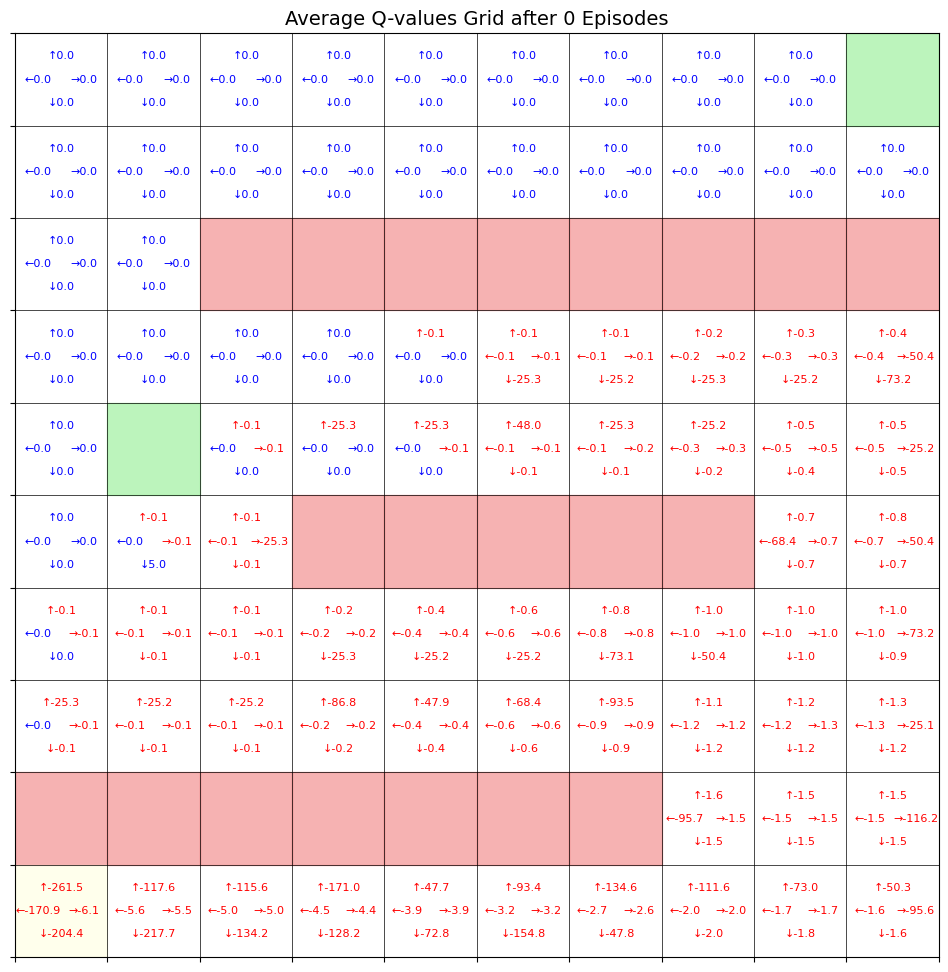

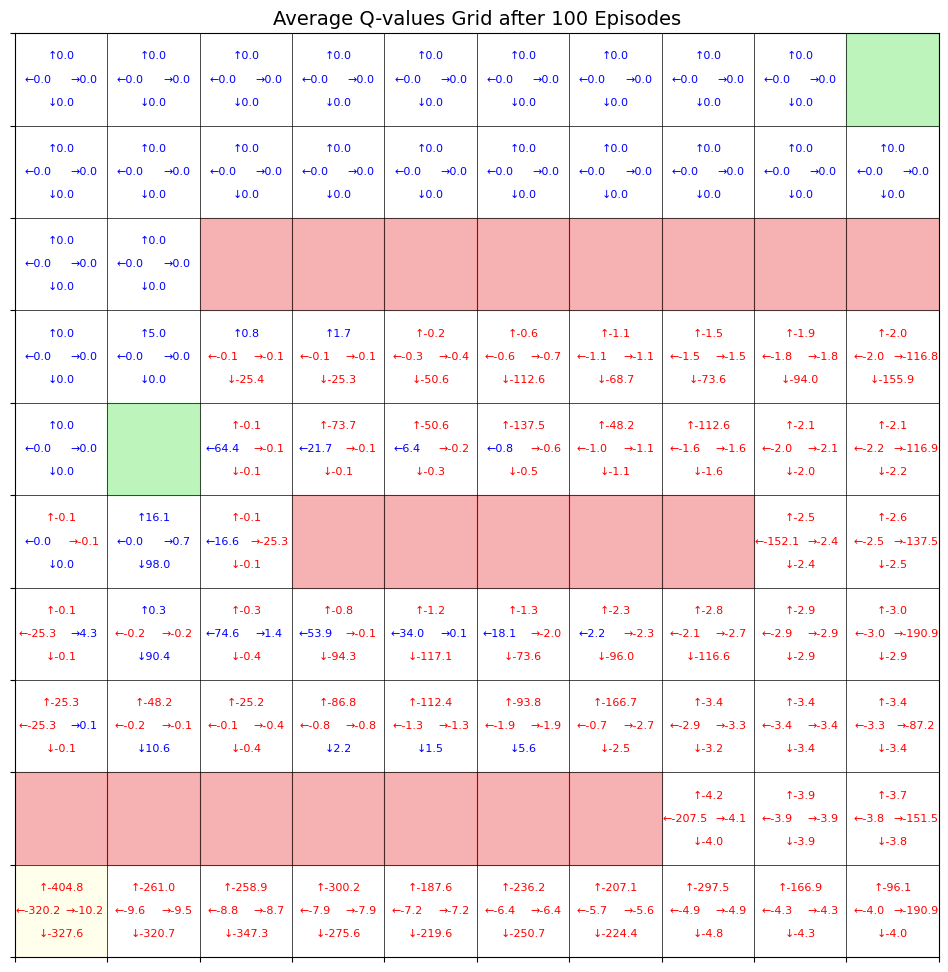

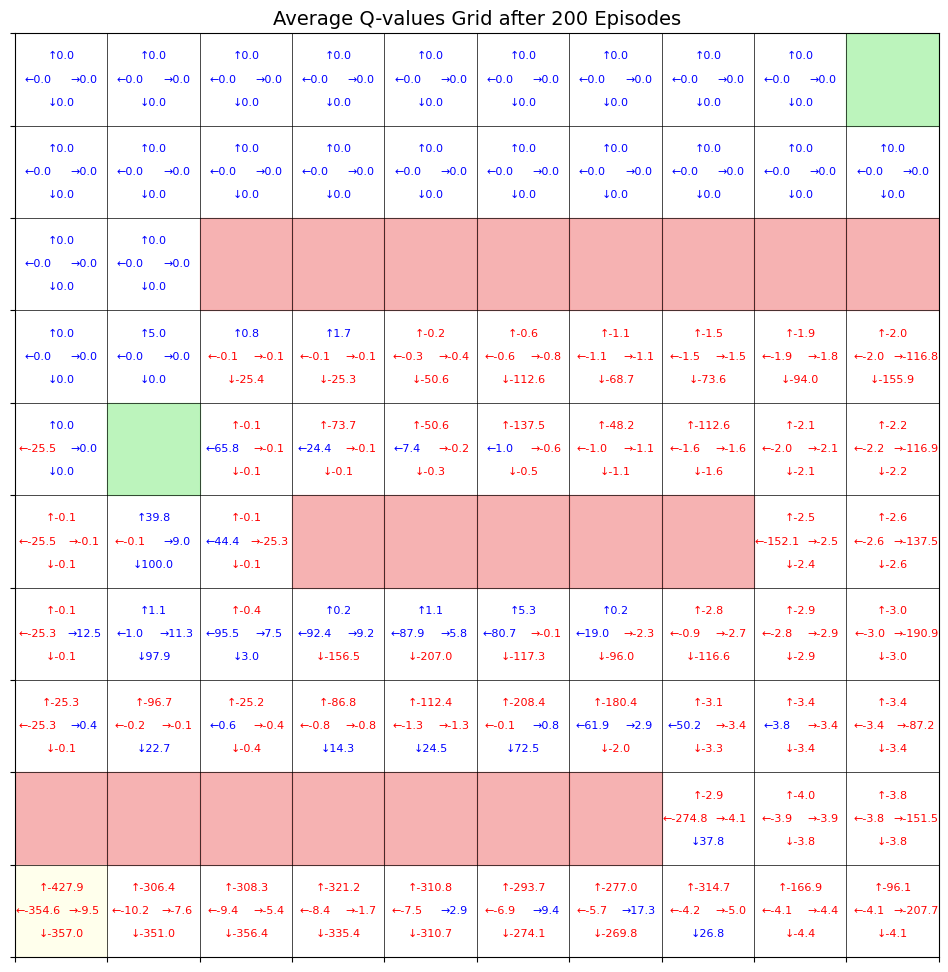

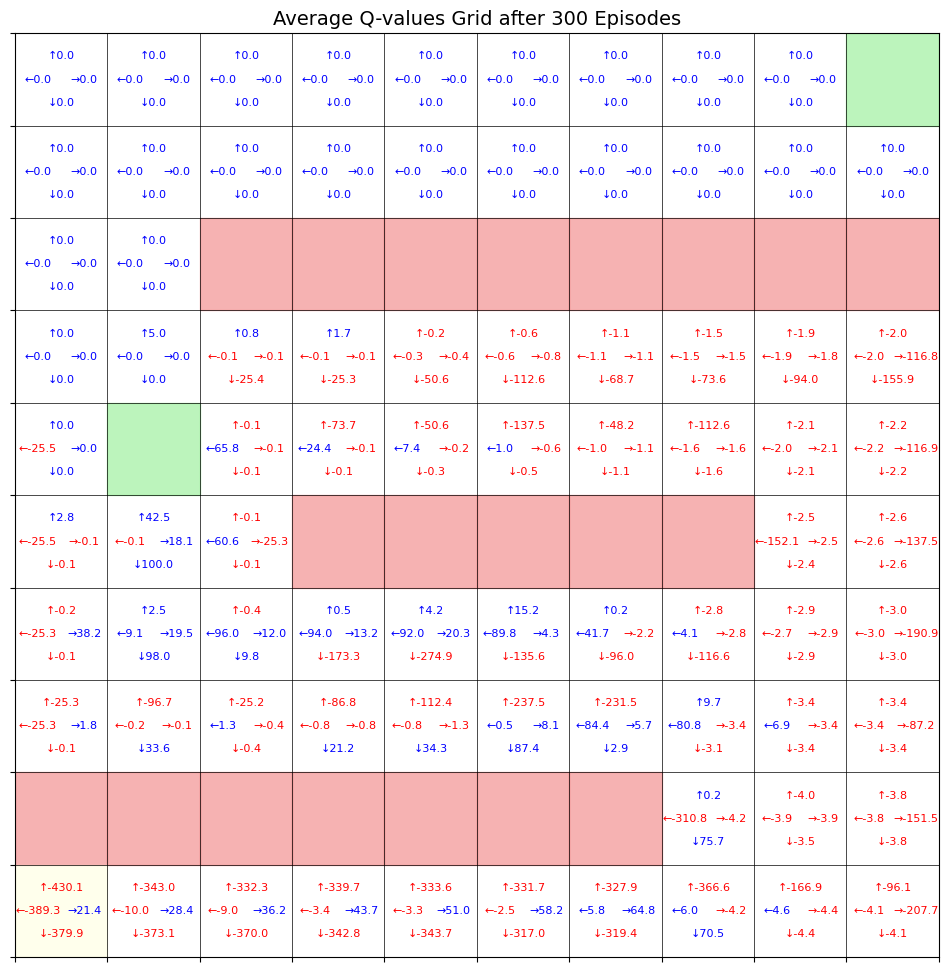

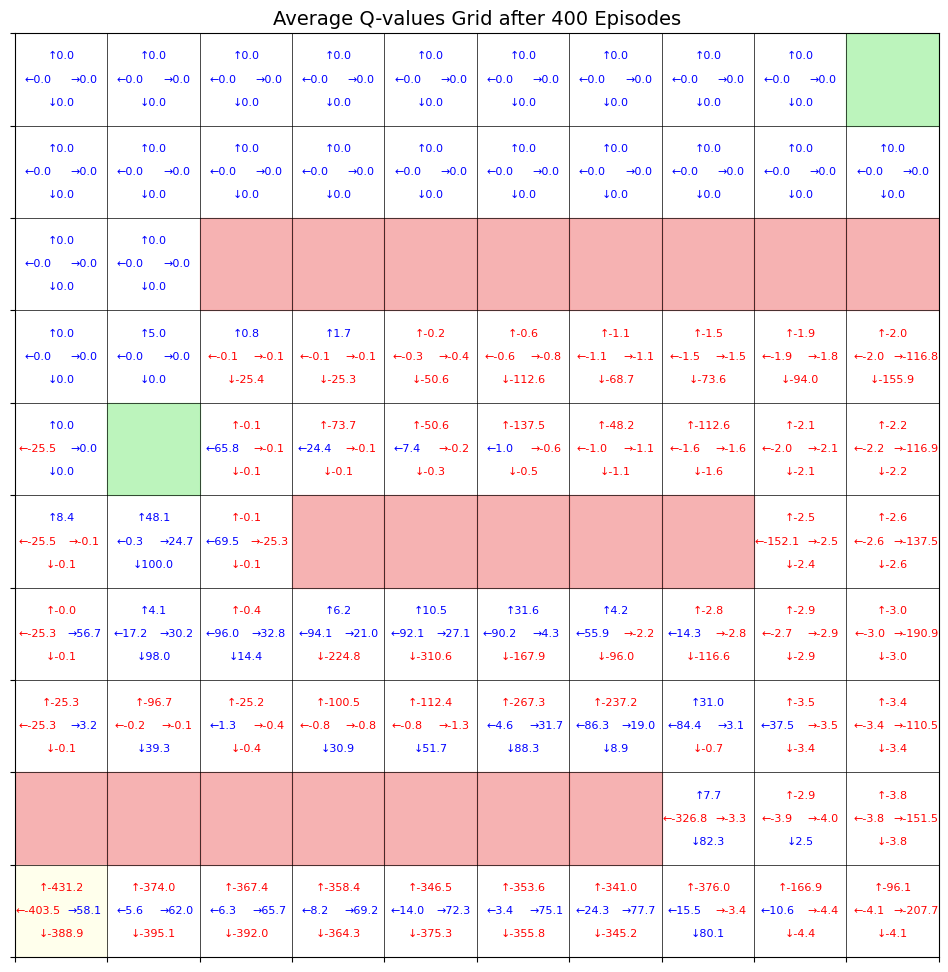

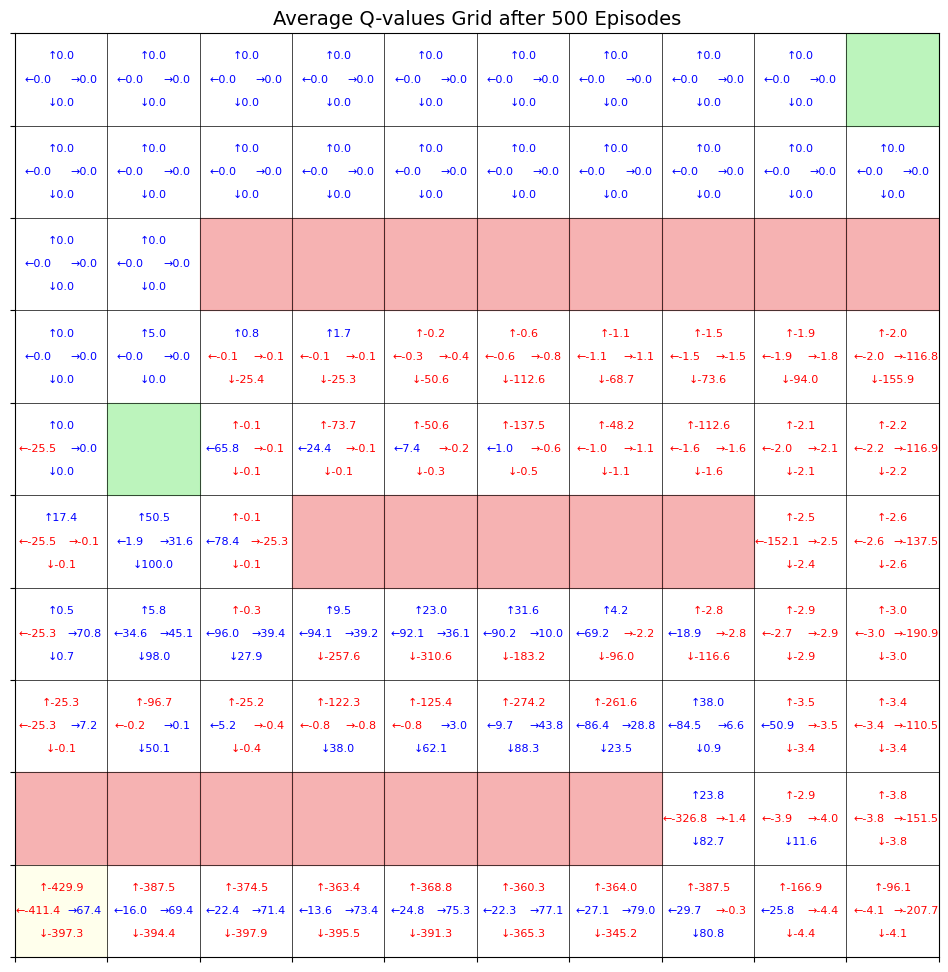

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Grid and cliff specifications
grid_size = (10, 10)
start_pos = (0, 0)  # Starting position
cliffs = [(1, i) for i in range(0, 7)] + [(4, i) for i in range(3, 8)] + [(7, i) for i in range(2, 10)]
exits = [(9, 9), (5, 1)]
episodes = 500
display_interval = 100

# Action mappings
ACTIONS = {
    0: (-1, 0),  # up
    1: (0, 1),   # right
    2: (1, 0),   # down
    3: (0, -1)   # left
}

class CliffWalkingEnv:
    def __init__(self, grid_size, start_pos, cliffs, exits):
        self.grid_size = grid_size
        self.start_pos = start_pos
        self.cliffs = cliffs
        self.exits = exits
        self.current_pos = start_pos

    def is_valid_position(self, pos):
        """Check if position is within grid boundaries"""
        return 0 <= pos[0] < self.grid_size[0] and 0 <= pos[1] < self.grid_size[1]

    def step(self, action):
        """Take action and return new state, reward, and done flag"""
        move = ACTIONS[action]
        new_pos = (self.current_pos[0] + move[0], self.current_pos[1] + move[1])

        if not self.is_valid_position(new_pos) or new_pos in self.cliffs:
            reward = -500
            self.current_pos = self.start_pos
            return self.current_pos, reward, False

        if new_pos in self.exits:
            reward = 100
            self.current_pos = new_pos
            return new_pos, reward, True

        reward = -1
        self.current_pos = new_pos
        return new_pos, reward, False

    def reset(self):
        """Reset environment to starting state"""
        self.current_pos = self.start_pos
        return self.start_pos

class MultiQLearningAgent:
    def __init__(self, state_size, action_size, num_q_tables=2, learning_rate=0.1, discount_factor=0.99, epsilon=0.1):
        self.q_tables = [
            {(i, j): np.zeros(action_size) for i in range(state_size[0]) for j in range(state_size[1])}
            for _ in range(num_q_tables)
        ]
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.num_q_tables = num_q_tables

    def get_action(self, state):
        # Use the sum of all Q-tables to decide on action (optimistic initial values)
        q_sums = np.sum([q[state] for q in self.q_tables], axis=0)
        if np.random.random() < self.epsilon:
            return np.random.randint(0, 4)
        return np.argmax(q_sums)

    def update(self, state, action, reward, next_state):
        chosen_q = random.choice(range(self.num_q_tables))

        # Compute the best action based on the sum of all Q-tables
        next_best_action = np.argmax(np.sum([q[next_state] for q in self.q_tables], axis=0))

        # Update only the chosen Q-table
        self.q_tables[chosen_q][state][action] += self.lr * (
            reward + self.gamma * self.q_tables[chosen_q][next_state][next_best_action]
            - self.q_tables[chosen_q][state][action]
        )

def plot_q_values(Q_tables, grid_size=(10, 10), episode=0, cliffs=[], exits=[]):
    # Compute the average Q-values over all Q-tables
    avg_Q = {(i, j): np.mean([Q[(i, j)] for Q in Q_tables], axis=0) for i in range(grid_size[0]) for j in range(grid_size[1])}

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(-0.5, grid_size[0] - 0.5)
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for (x, y) in cliffs:
        ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightcoral', alpha=0.6))
    for (x, y) in exits:
        ax.add_patch(plt.Rectangle((y - 0.5, x - 0.5), 1, 1, color='lightgreen', alpha=0.6))
    ax.add_patch(plt.Rectangle((-0.5, -0.5), 1, 1, color='lightyellow', alpha=0.6))

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) not in cliffs and (i, j) not in exits:
                up, right, down, left = avg_Q[(i, j)]

                def get_color(value):
                    return 'blue' if value >= 0 else 'red'

                ax.text(j, i + 0.25, f"↑{up:.1f}", ha='center', va='center', fontsize=8, color=get_color(up))
                ax.text(j + 0.25, i, f"→{right:.1f}", ha='center', va='center', fontsize=8, color=get_color(right))
                ax.text(j, i - 0.25, f"↓{down:.1f}", ha='center', va='center', fontsize=8, color=get_color(down))
                ax.text(j - 0.25, i, f"←{left:.1f}", ha='center', va='center', fontsize=8, color=get_color(left))

    plt.title(f"Average Q-values Grid after {episode} Episodes", fontsize=14)
    ax.set_aspect('equal')
    plt.show()

# Initialize environment and agent for Double Q-learning (2 Q-tables)
env = CliffWalkingEnv(grid_size, start_pos, cliffs, exits)
agent = MultiQLearningAgent(grid_size, len(ACTIONS), num_q_tables=2)

# Training loop
for ep in range(episodes + 1):
    state = env.reset()
    done = False
    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.update(state, action, reward, next_state)
        state = next_state

    if ep % display_interval == 0:
        plot_q_values(agent.q_tables, grid_size=grid_size, episode=ep, cliffs=cliffs, exits=exits)

# Repeat the same for Triple Q-learning and Quadruple Q-learning by changing `num_q_tables=3` and `num_q_tables=4`.


In [ ]:
import numpy as np

# Initialize environment parameters
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
penalty = -500  # Cliff penalty for the right move leading to reset
reward_step = -1  # Regular step reward

# Episode definition
episode_moves = ["up", "up", "up", "up", "right"]
episode_rewards = [reward_step, reward_step, reward_step, reward_step, penalty]

# Initialize Q-tables for each method with zeros
q_learning_table = np.zeros((10, 10, 4))  # For Q-learning (single table)
double_q_A = np.zeros((10, 10, 4))  # Q_A table for Double Q-learning
double_q_B = np.zeros((10, 10, 4))  # Q_B table for Double Q-learning
triple_q_A = np.zeros((10, 10, 4))  # Q_A table for Triple Q-learning
triple_q_B = np.zeros((10, 10, 4))  # Q_B table for Triple Q-learning
triple_q_C = np.zeros((10, 10, 4))  # Q_C table for Triple Q-learning
quad_q_A = np.zeros((10, 10, 4))    # Q_A table for Quadruple Q-learning
quad_q_B = np.zeros((10, 10, 4))    # Q_B table for Quadruple Q-learning
quad_q_C = np.zeros((10, 10, 4))    # Q_C table for Quadruple Q-learning
quad_q_D = np.zeros((10, 10, 4))    # Q_D table for Quadruple Q-learning

# Define action indices
actions = {"up": 0, "down": 1, "left": 2, "right": 3}

# Starting state
state = (0, 0)

# Helper function to display Q-tables
def display_q_tables(move_number):
    print(f"\nAfter Move {move_number + 1}: '{episode_moves[move_number]}'")
    print("Q-learning Q-Table:")
    print(q_learning_table)
    print("\nDouble Q-learning Q_A Table:")
    print(double_q_A)
    print("Double Q-learning Q_B Table:")
    print(double_q_B)
    print("\nTriple Q-learning Q_A Table:")
    print(triple_q_A)
    print("Triple Q-learning Q_B Table:")
    print(triple_q_B)
    print("Triple Q-learning Q_C Table:")
    print(triple_q_C)
    print("\nQuadruple Q-learning Q_A Table:")
    print(quad_q_A)
    print("Quadruple Q-learning Q_B Table:")
    print(quad_q_B)
    print("Quadruple Q-learning Q_C Table:")
    print(quad_q_C)
    print("Quadruple Q-learning Q_D Table:")
    print(quad_q_D)

# Q-learning Update Functions
def q_learning_update(state, action, reward, next_state):
    max_q_next = np.max(q_learning_table[next_state])
    q_learning_table[state][action] += alpha * (reward + gamma * max_q_next - q_learning_table[state][action])

def double_q_learning_update(state, action, reward, next_state):
    if np.random.rand() < 0.5:
        max_action_qB = np.argmax(double_q_A[next_state])
        target = reward + gamma * double_q_B[next_state][max_action_qB]
        double_q_A[state][action] += alpha * (target - double_q_A[state][action])
    else:
        max_action_qA = np.argmax(double_q_B[next_state])
        target = reward + gamma * double_q_A[next_state][max_action_qA]
        double_q_B[state][action] += alpha * (target - double_q_B[state][action])

def triple_q_learning_update(state, action, reward, next_state):
    if np.random.rand() < 1/3:
        max_action_qC = np.argmax(triple_q_B[next_state])
        target = reward + (gamma / 2) * (triple_q_B[next_state][max_action_qC] + triple_q_C[next_state][max_action_qC])
        triple_q_A[state][action] += alpha * (target - triple_q_A[state][action])
    elif np.random.rand() < 2/3:
        max_action_qA = np.argmax(triple_q_C[next_state])
        target = reward + (gamma / 2) * (triple_q_A[next_state][max_action_qA] + triple_q_C[next_state][max_action_qA])
        triple_q_B[state][action] += alpha * (target - triple_q_B[state][action])
    else:
        max_action_qB = np.argmax(triple_q_A[next_state])
        target = reward + (gamma / 2) * (triple_q_A[next_state][max_action_qB] + triple_q_B[next_state][max_action_qB])
        triple_q_C[state][action] += alpha * (target - triple_q_C[state][action])

def quadruple_q_learning_update(state, action, reward, next_state):
    table_choice = np.random.randint(4)
    max_q_values = [quad_q_A, quad_q_B, quad_q_C, quad_q_D]
    tables_except_current = [max_q_values[(table_choice + i) % 4] for i in range(1, 4)]
    max_action_q = np.argmax(tables_except_current[0][next_state])
    target = reward + (gamma / 3) * sum([table[next_state][max_action_q] for table in tables_except_current])
    max_q_values[table_choice][state][action] += alpha * (target - max_q_values[table_choice][state][action])

# Run the episode
for move_number, (move, reward) in enumerate(zip(episode_moves, episode_rewards)):
    action = actions[move]
    next_state = (state[0] + (1 if move == "up" else 0), state[1] + (1 if move == "right" else 0))

    # Perform updates for each Q-learning method
    q_learning_update(state, action, reward, next_state)
    double_q_learning_update(state, action, reward, next_state)
    triple_q_learning_update(state, action, reward, next_state)
    quadruple_q_learning_update(state, action, reward, next_state)

    # Display the Q-tables after each move
    display_q_tables(move_number)

    # Update state
    state = next_state if reward != penalty else (0, 0)  # Reset to (0,0) if penalty occurs


Streaming output truncated to the last 5000 lines.
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]]

 [[ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]]

 [[ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]
  [ 0.   0.   0.   0. ]]]
Triple Q-learning Q_C Table:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0.

In [ ]:
import numpy as np
import pandas as pd

# Initialize environment parameters
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
penalty = -500  # Cliff penalty for the right move leading to reset
reward_step = -1  # Regular step reward

# Episode definition
episode_moves = ["up", "up", "up", "up", "right"]
episode_rewards = [reward_step, reward_step, reward_step, reward_step, penalty]

# Initialize Q-tables for each method with zeros
q_learning_table = np.zeros((10, 10, 4))  # For Q-learning (single table)
double_q_A = np.zeros((10, 10, 4))  # Q_A table for Double Q-learning
double_q_B = np.zeros((10, 10, 4))  # Q_B table for Double Q-learning
triple_q_A = np.zeros((10, 10, 4))  # Q_A table for Triple Q-learning
triple_q_B = np.zeros((10, 10, 4))  # Q_B table for Triple Q-learning
triple_q_C = np.zeros((10, 10, 4))  # Q_C table for Triple Q-learning
quad_q_A = np.zeros((10, 10, 4))    # Q_A table for Quadruple Q-learning
quad_q_B = np.zeros((10, 10, 4))    # Q_B table for Quadruple Q-learning
quad_q_C = np.zeros((10, 10, 4))    # Q_C table for Quadruple Q-learning
quad_q_D = np.zeros((10, 10, 4))    # Q_D table for Quadruple Q-learning

# Define action indices
actions = {"up": 0, "down": 1, "left": 2, "right": 3}

# Starting state
state = (0, 0)

# Helper function to display Q-tables
def display_q_tables(move_number):
    print(f"\nAfter Move {move_number + 1}: '{episode_moves[move_number]}'")

    # Display Q-learning Q-table
    print("\nQ-learning Q-Table:")
    q_learning_df = pd.DataFrame(q_learning_table[:, :, :].max(axis=2),
                                  index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                  columns=["Up", "Down", "Left", "Right"])
    print(q_learning_df)

    # Display Double Q-learning Q-tables
    print("\nDouble Q-learning Q_A Table:")
    double_q_A_df = pd.DataFrame(double_q_A[:, :, :].max(axis=2),
                                  index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                  columns=["Up", "Down", "Left", "Right"])
    print(double_q_A_df)

    print("Double Q-learning Q_B Table:")
    double_q_B_df = pd.DataFrame(double_q_B[:, :, :].max(axis=2),
                                  index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                  columns=["Up", "Down", "Left", "Right"])
    print(double_q_B_df)

    # Display Triple Q-learning Q-tables
    print("\nTriple Q-learning Q_A Table:")
    triple_q_A_df = pd.DataFrame(triple_q_A[:, :, :].max(axis=2),
                                  index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                  columns=["Up", "Down", "Left", "Right"])
    print(triple_q_A_df)

    print("Triple Q-learning Q_B Table:")
    triple_q_B_df = pd.DataFrame(triple_q_B[:, :, :].max(axis=2),
                                  index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                  columns=["Up", "Down", "Left", "Right"])
    print(triple_q_B_df)

    print("Triple Q-learning Q_C Table:")
    triple_q_C_df = pd.DataFrame(triple_q_C[:, :, :].max(axis=2),
                                  index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                  columns=["Up", "Down", "Left", "Right"])
    print(triple_q_C_df)

    # Display Quadruple Q-learning Q-tables
    print("\nQuadruple Q-learning Q_A Table:")
    quad_q_A_df = pd.DataFrame(quad_q_A[:, :, :].max(axis=2),
                                index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                columns=["Up", "Down", "Left", "Right"])
    print(quad_q_A_df)

    print("Quadruple Q-learning Q_B Table:")
    quad_q_B_df = pd.DataFrame(quad_q_B[:, :, :].max(axis=2),
                                index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                columns=["Up", "Down", "Left", "Right"])
    print(quad_q_B_df)

    print("Quadruple Q-learning Q_C Table:")
    quad_q_C_df = pd.DataFrame(quad_q_C[:, :, :].max(axis=2),
                                index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                columns=["Up", "Down", "Left", "Right"])
    print(quad_q_C_df)

    print("Quadruple Q-learning Q_D Table:")
    quad_q_D_df = pd.DataFrame(quad_q_D[:, :, :].max(axis=2),
                                index=[f"({i},{j})" for i in range(10) for j in range(10)],
                                columns=["Up", "Down", "Left", "Right"])
    print(quad_q_D_df)

# Q-learning Update Functions
def q_learning_update(state, action, reward, next_state):
    max_q_next = np.max(q_learning_table[next_state])
    q_learning_table[state][action] += alpha * (reward + gamma * max_q_next - q_learning_table[state][action])

def double_q_learning_update(state, action, reward, next_state):
    if np.random.rand() < 0.5:
        max_action_qB = np.argmax(double_q_A[next_state])
        target = reward + gamma * double_q_B[next_state][max_action_qB]
        double_q_A[state][action] += alpha * (target - double_q_A[state][action])
    else:
        max_action_qA = np.argmax(double_q_B[next_state])
        target = reward + gamma * double_q_A[next_state][max_action_qA]
        double_q_B[state][action] += alpha * (target - double_q_B[state][action])

def triple_q_learning_update(state, action, reward, next_state):
    if np.random.rand() < 1/3:
        max_action_qC = np.argmax(triple_q_B[next_state])
        target = reward + (gamma / 2) * (triple_q_B[next_state][max_action_qC] + triple_q_C[next_state][max_action_qC])
        triple_q_A[state][action] += alpha * (target - triple_q_A[state][action])
    elif np.random.rand() < 2/3:
        max_action_qA = np.argmax(triple_q_C[next_state])
        target = reward + (gamma / 2) * (triple_q_A[next_state][max_action_qA] + triple_q_C[next_state][max_action_qA])
        triple_q_B[state][action] += alpha * (target - triple_q_B[state][action])
    else:
        max_action_qB = np.argmax(triple_q_A[next_state])
        target = reward + (gamma / 2) * (triple_q_A[next_state][max_action_qB] + triple_q_B[next_state][max_action_qB])
        triple_q_C[state][action] += alpha * (target - triple_q_C[state][action])

def quadruple_q_learning_update(state, action, reward, next_state):
    table_choice = np.random.randint(4)
    max_q_values = [quad_q_A, quad_q_B, quad_q_C, quad_q_D]
    tables_except_current = [max_q_values[(table_choice + i) % 4] for i in range(1, 4)]
    max_action_q = np.argmax(tables_except_current[0][next_state])
    target = reward + (gamma / 3) * sum([table[next_state][max_action_q] for table in tables_except_current])
    max_q_values[table_choice][state][action] += alpha * (target - max_q_values[table_choice][state][action])

# Run the episode
for move_number, (move, reward) in enumerate(zip(episode_moves, episode_rewards)):
    action = actions[move]
    next_state = (state[0] + (1 if move == "up" else 0) - (1 if move == "down" else 0),
                  state[1] + (1 if move == "right" else 0) - (1 if move == "left" else 0))

    # Ensure next_state is within bounds
    if next_state[0] < 0 or next_state[0] >= 10 or next_state[1] < 0 or next_state[1] >= 10:
        next_state = state  # Reset to the current state if out of bounds

    # Update Q-tables for each method
    q_learning_update(state, action, reward, next_state)
    double_q_learning_update(state, action, reward, next_state)
    triple_q_learning_update(state, action, reward, next_state)
    quadruple_q_learning_update(state, action, reward, next_state)

    # Display the Q-tables after each move
    display_q_tables(move_number)

    # Update state
    state = next_state



After Move 1: 'up'

Q-learning Q-Table:


ValueError: Shape of passed values is (10, 10), indices imply (100, 4)